---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [60]:
df = pd.read_csv('sbikedata.csv')
df.describe()

hour         PM10        PM2.5        ozone  temperature  \
count  5827.000000  5725.000000  5732.000000  5699.000000  5827.000000   
mean     11.506607    31.970655    15.666609     0.031811    19.376798   
std       6.921963    42.987292    13.850990     0.018277     7.501572   
min       0.000000     3.000000     1.000000     0.001000    -3.500000   
25%       6.000000    16.000000     7.000000     0.019000    14.100000   
50%      12.000000    25.000000    13.000000     0.031000    20.400000   
75%      18.000000    37.000000    20.000000     0.041000    24.900000   
max      23.000000   827.000000   125.000000     0.137000    36.300000   

       precipitation    windspeed     humidity   visibility        count  
count    5827.000000  5827.000000  5827.000000  5827.000000  5827.000000  
mean        0.075511     2.237601    68.608718  1758.438648   215.117899  
std         0.264236     1.054516    17.277266   490.969394   185.972900  
min         0.000000     0.000000    19.000000    60.000000     1.000000  
25%         0.000000     1.500000    56.000000  1935.500000    53.000000  
50%         0.000000     2.200000    70.000000  2000.000000   186.000000  
75%         0.000000     2.800000    82.000000  2000.000000   315.000000  
max         1.000000     8.300000   100.000000  2000.000000  1746.000000

### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1
    + $H_0$ : 강우 여부와 따릉이 간에는 연관성이 없다.
    + $H_1$ : 강우 여부와 따릉이 간에는 연관성이 있다.

- 가설 2
    + $H_0$ : 온도와 따릉이 간에는 연관성이 없다.
    + $H_1$ : 온도와 따릉이 간에는 연관성이 있다.

- 가설 3
    + $H_0$ : 미세먼지와 따릉이 간에는 연관성이 없다.
    + $H_1$ : 미세먼지와 따릉이 간에는 연관성이 있다.

- 가설 4
    + $H_0$ : 시간과 따릉이 간에는 연관성이 없다.
    + $H_1$ : 시간과 따릉이 간에는 연관성이 있다.

- 가설 5
    + $H_0$ : 계절과 따릉이 간에는 연관성이 없다.
    + $H_1$ : 계절과 따릉이 간에는 연관성이 있다.

- 가설 6
    + $H_0$ : ?와 따릉이간에는 연관성이 없다.
    + $H_1$ : ?와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미
+ 시간

2. 변수가 수치형인지 범주형인지
+ 숫자로 되어있지만 24시간의 범주로 봐야하지 않을까 생각됨
+ 아니면 사분위수를 통해 시간을 나눠보는것도 좋아보임


In [28]:
df['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안
+ 현재 hour는 결측치가 존재하지 않음

In [29]:
# 단변량 숫자형
def eda_1_n(data, var, bins = 30) :
    display(data[[var]].describe().T)
    print('-' * 70)
    plt.figure(figsize = (8,6))
    plt.subplot(2,1,1)
    sns.histplot(x=var, data = data, bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=var, data = data)
    plt.grid()
    plt.tight_layout()
    plt.show()

# 단변량 범주형
def eda_1_c(data, var) :
    print(f'<< {var} >>')
    temp1 = data[var].value_counts()
    temp2 = data[var].value_counts()/ data.shape[0]
    temp3 = pd.DataFrame({'class':temp1.index, 'count':temp1.values, 'prop':temp2.values})
    display(temp3)
    print('-' * 70)
    sns.countplot(x = var, data = data)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [104]:
#date형이 object타입이었기에 미리 date형으로 바꾸기
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2021-04-01
1   2021-04-01
2   2021-04-01
3   2021-04-01
4   2021-04-01
Name: date, dtype: datetime64[ns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

count       mean       std  min  25%   50%   75%   max
hour  5827.0  11.506607  6.921963  0.0  6.0  12.0  18.0  23.0

----------------------------------------------------------------------


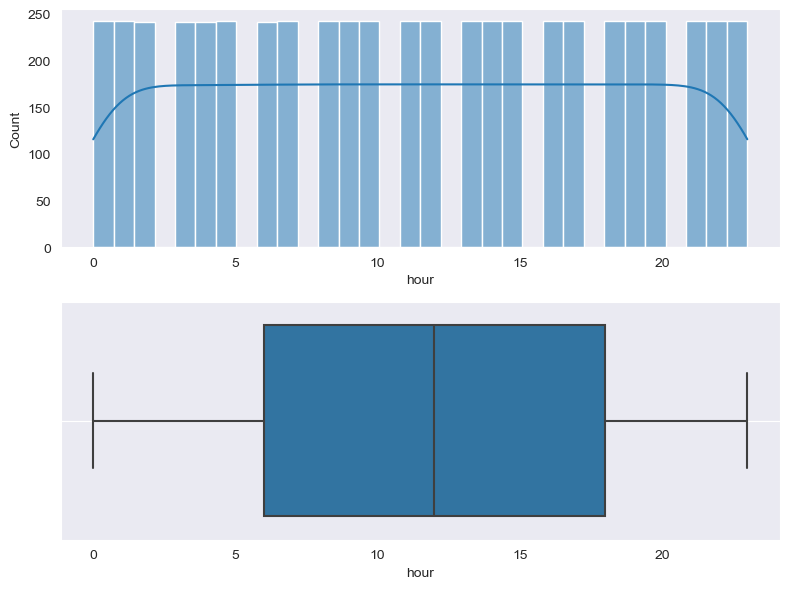

In [31]:
eda_1_n(df, 'hour', bins=32)

6. 위 정보로 부터 파악한 내용 정리

+ 숫자형이 아닌 범주형으로 봐야할것 같음
+ 범주를 나눌때는 사분위수를 기준으로 q1, 중간값, q3로 나누면 깔끔할것 같음

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 온도

2. 변수가 수치형인지 범주형인지
+ 수치형

In [32]:
display(df['temperature'].info())
display(df['temperature'].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


None

0    13.1
1    12.4
2    13.1
3    13.0
4    13.0
Name: temperature, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안
+ 결측치 존재 x

In [33]:
temp = df.loc[df['temperature'].isna(), :]
temp.head(100) # 결측치 없음

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []

4. 변수의 기초 통계량 확인

In [34]:
df[['temperature']].describe().T

count       mean       std  min   25%   50%   75%   max
temperature  5827.0  19.376798  7.501572 -3.5  14.1  20.4  24.9  36.3

5. 변수의 분포 확인

count       mean       std  min   25%   50%   75%   max
temperature  5827.0  19.376798  7.501572 -3.5  14.1  20.4  24.9  36.3

----------------------------------------------------------------------


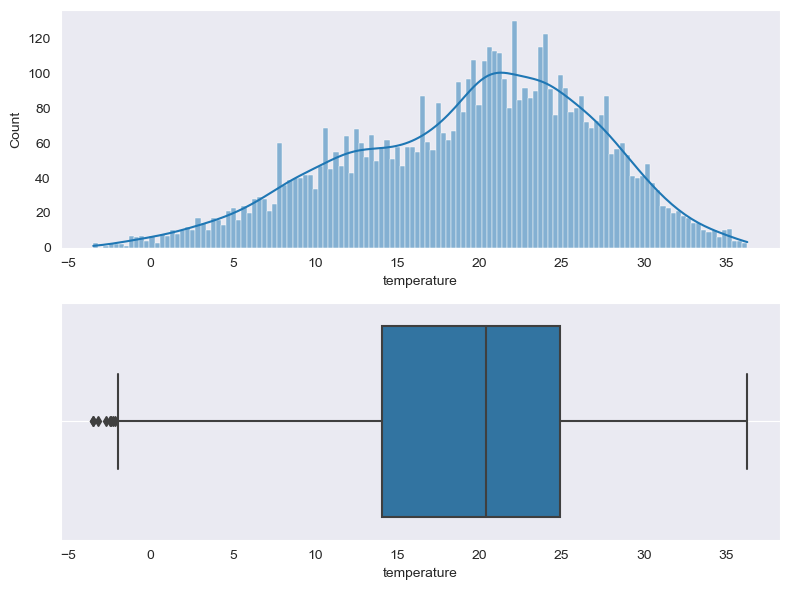

In [35]:
eda_1_n(df, 'temperature', bins=128)

6. 위 정보로 부터 파악한 내용 정리

위 정보로부터 파악하신 내용을 정리해보세요.
+ 온도에 대한 정보가 20~25가 많음(봄, 여름, 가을날씨)
+ 겨울에 대한 데이터가 있는가?
+ date를 확인할 필요가 존재

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 강우 여부

2. 변수가 수치형인지 범주형인지
+ 범주형


In [36]:
df['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


In [14]:
df['precipitation'].head()

0    0
1    0
2    0
3    0
4    0
Name: precipitation, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안
+ 결측치 존재 x

In [16]:
df['precipitation'].isna().sum()

0

4. 변수의 기초 통계량 확인

<< precipitation >>


class  count      prop
0      0   5387  0.924489
1      1    440  0.075511

----------------------------------------------------------------------


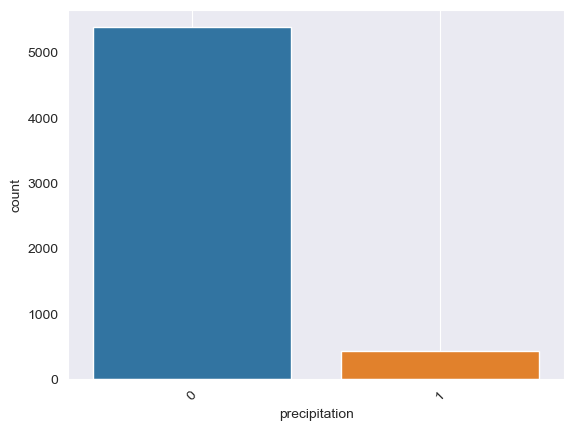

In [18]:
eda_1_c(df, 'precipitation')

5. 위 정보로 부터 파악한 내용 정리
+ 강수가 없는 데이터가 많음

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 풍속

2. 변수가 수치형인지 범주형인지
+ 수치형


In [19]:
df['windspeed'].head()

0    1.4
1    2.1
2    3.4
3    3.1
4    2.9
Name: windspeed, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안
+ 결측치 존재하지 않음

In [21]:
df['windspeed'].isna().sum()

0

4. 변수의 기초 통계량 확인

count      mean       std  min  25%  50%  75%  max
windspeed  5827.0  2.237601  1.054516  0.0  1.5  2.2  2.8  8.3

----------------------------------------------------------------------


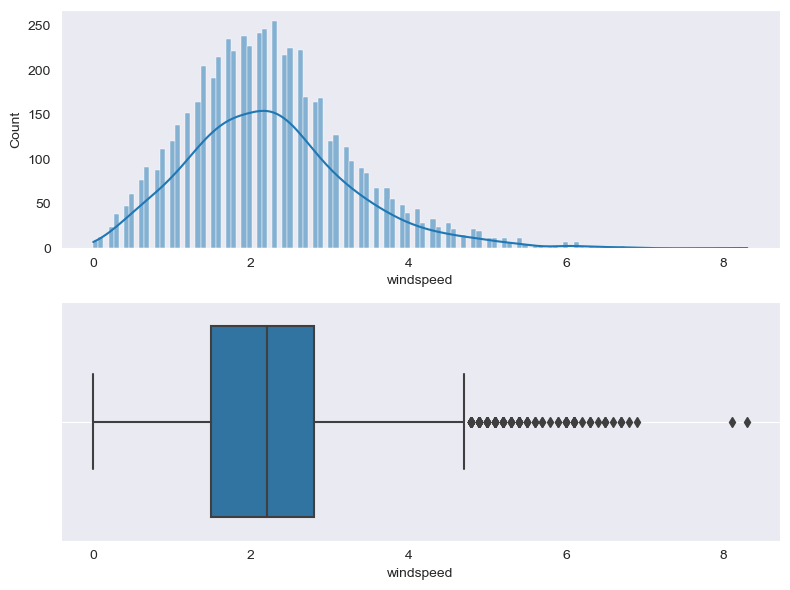

In [22]:
eda_1_n(df, 'windspeed', bins=128)

6. 위 정보로 부터 파악한 내용 정리
+ 이상치가 있음(대부분 풍속이 2 근처)
+ 여름에 태풍이 이상치일까?

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 습도

2. 변수가 수치형인지 범주형인지
+ 수치형


In [25]:
df['humidity'].head()

0    49
1    53
2    43
3    44
4    44
Name: humidity, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

count       mean        std   min   25%   50%   75%    max
humidity  5827.0  68.608718  17.277266  19.0  56.0  70.0  82.0  100.0

----------------------------------------------------------------------


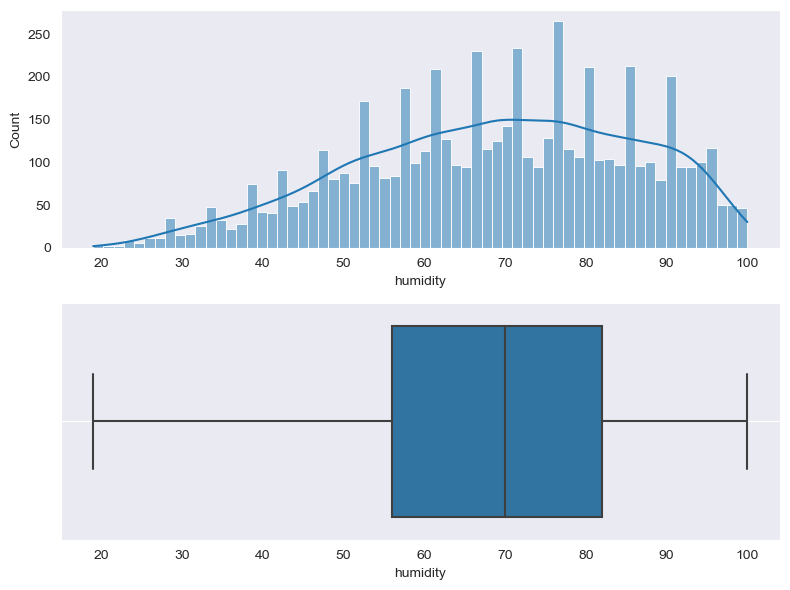

In [48]:
#변수의 기초 통계량을 확인해보세요
eda_1_n(df, 'humidity', bins=64)

6. 위 정보로 부터 파악한 내용 정리
+ 우리나라의 평균 습도는 60~80
+ 80 이상은 여름철 장마
+ 습도가 낮은 부분이 얼마 없는것으로 보아 겨울철 데이터의 부재가 눈에 보임

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
+ 특정 기상 상태에 따른 가시성

2. 변수가 수치형인지 범주형인지
+ 수치형


In [38]:
df['visibility'].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [39]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
df['visibility'].isna().sum()

0

4. 변수의 기초 통계량 확인

count         mean         std   min     25%     50%     75%  \
visibility  5827.0  1758.438648  490.969394  60.0  1935.5  2000.0  2000.0   

               max  
visibility  2000.0

----------------------------------------------------------------------


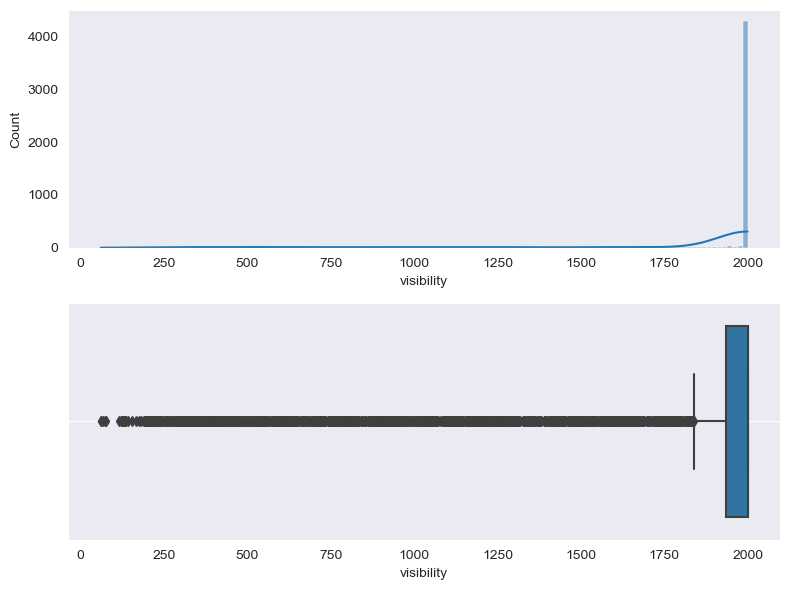

In [40]:
eda_1_n(df, 'visibility', bins=128)

6. 위 정보로 부터 파악한 내용 정리
+ 대부분이 가시성이 좋은 데이터로 이루어져 있음(이상치 부분을 범주화 해서 2개를 나눠서 봐야할까?)
    + 하지만 그러기에는 데이터의 분포가 25%도 되지 못함
    + 해당 이상치가 어느 상황인지 파악할 필요가 있음

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 오존수치

2. 변수가 수치형인지 범주형인지
+ 수치형

In [42]:
df['ozone'].head()

0    0.002
1    0.003
2    0.023
3    0.028
4    0.008
Name: ozone, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안
+ 결측치가 128개 존재
+ 처리는 해당 데이터가 시간의 흐름(시계열)이기에 이전날의 값과 다음날의 평균을 사용하면 좋을듯 함)

In [65]:
df['ozone'].isna().sum()

128

In [66]:
df['ozone'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5822    False
5823    False
5824    False
5825    False
5826    False
Name: ozone, Length: 5827, dtype: bool

In [69]:
df['ozone'][df['ozone'].isna()]

274    NaN
275    NaN
538    NaN
539    NaN
540    NaN
        ..
5648   NaN
5649   NaN
5650   NaN
5651   NaN
5652   NaN
Name: ozone, Length: 128, dtype: float64

In [67]:
df1 = df['ozone'].copy()

In [68]:
df1['ozone'] = df['ozone'].interpolate(method='values')
df1['ozone'][df['ozone'].isna()]

274     0.036667
275     0.037333
538     0.039250
539     0.039500
540     0.039750
          ...   
5648    0.018261
5649    0.018609
5650    0.018957
5651    0.019304
5652    0.019652
Name: ozone, Length: 128, dtype: float64

In [70]:
# 선형으로 비례하는 값들로 결측치를 채움
df['ozone'] = df['ozone'].interpolate(method='values')

In [71]:
df['ozone'].isna().sum()

0

4. 변수의 분포 확인

count      mean       std    min    25%   50%    75%    max
ozone  5827.0  0.031634  0.018263  0.001  0.019  0.03  0.041  0.137

----------------------------------------------------------------------


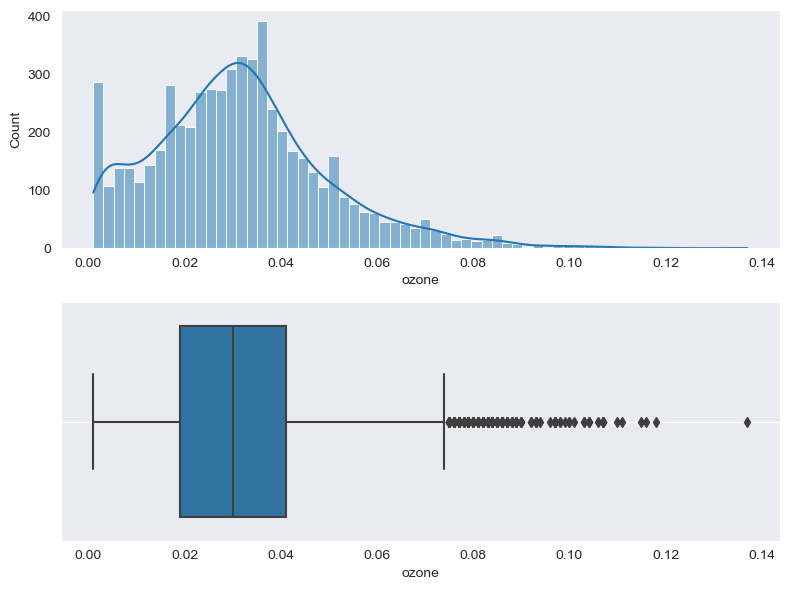

In [73]:
t = df['ozone'].notnull()

temp = df.loc[t, :]
eda_1_n(temp, 'ozone', bins=64)

5. 위 정보로 부터 파악한 내용 정리
+ 이상치는 오존농도가 높은 부분에서만 존재
+ 여름에 오존농도가 높지 않을까 추측

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 미세먼지 수치

2. 변수가 수치형인지 범주형인지
+ 수치형

In [75]:
display(df.loc[df['PM10'] == 0, ['PM10']].count())
display(df['PM10'].isna().sum())

PM10    0
dtype: int64

102

3. 변수의 결측치 존재 여부 및 조치방안

In [77]:
# 선형으로 비례하는 값들로 결측치를 채움
df['PM10'] = df['PM10'].interpolate(method='values')

In [78]:
df['PM10'].isna().sum()

0

4. 변수의 기초 통계량 확인

count       mean        std  min   25%   50%   75%    max
PM10  5827.0  31.833705  42.650908  3.0  16.0  25.0  37.0  827.0

----------------------------------------------------------------------


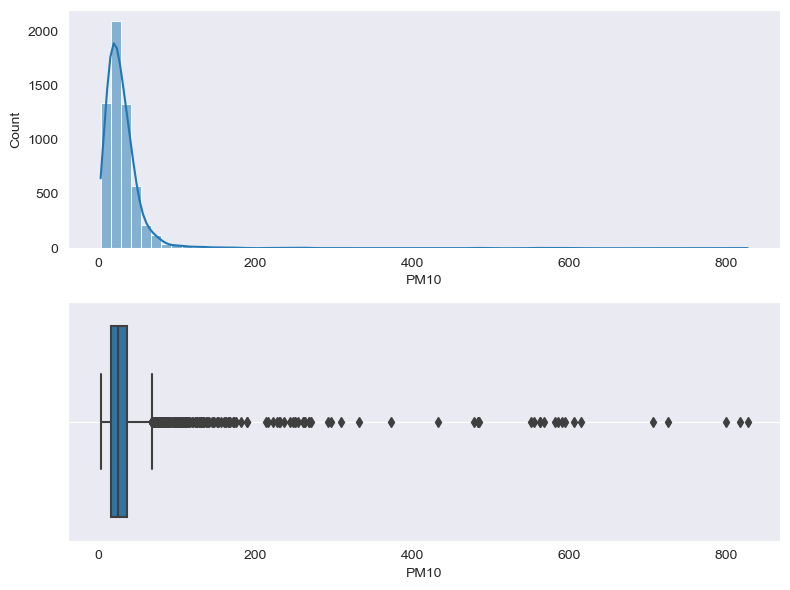

In [79]:
temp = df.loc[df['PM10'].notnull(), :]
eda_1_n(temp, 'PM10', bins=64)

6. 위 정보로 부터 파악한 내용 정리
+ 오존과 비슷한 느낌으로 결측치가 있음

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 초미세먼지

In [80]:
display(df.loc[df['PM2.5'] == 0, ['PM2.5']].count())
display(df['PM2.5'].isna().sum())
df.loc[df['PM2.5'].isna(), ['PM2.5']] = 0
display(df[['PM2.5']].value_counts())

PM2.5    0
dtype: int64

95

PM2.5
5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
71.0       1
95.0       1
91.0       1
82.0       1
125.0      1
Length: 111, dtype: int64

2. 변수가 수치형인지 범주형인지
+ 수치형


3. 변수의 결측치 존재 여부 및 조치방안

In [81]:
# 선형으로 비례하는 값들로 결측치를 채움
df['PM2.5'] = df['PM2.5'].interpolate(method='values')

In [82]:
df['PM10'].isna().sum()

0

4. 변수의 기초 통계량 확인

count       mean       std  min  25%   50%   75%    max
PM2.5  5827.0  15.411189  13.88015  0.0  7.0  13.0  20.0  125.0

----------------------------------------------------------------------


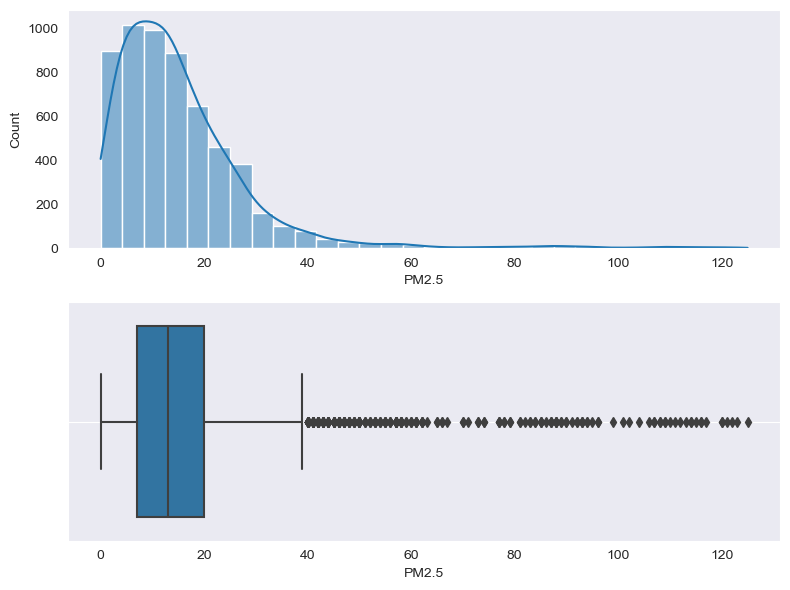

In [83]:
eda_1_n(df, 'PM2.5')

5. 위 정보로 부터 파악한 내용 정리
+ 오존, PM10 과 비슷한 구조

### Count (Target)

1. 변수가 내포하고 있는 의미
- 따릉이 대여량

2. 변수가 수치형인지 범주형인지
+ 수치형

In [88]:
df[['count']].describe().T

count        mean       std  min   25%    50%    75%     max
count  5827.0  215.117899  185.9729  1.0  53.0  186.0  315.0  1746.0

3. 변수의 결측치 존재 여부 및 조치방안

In [87]:
df['count'].isna().sum()

0

4. 변수의 기초 통계량 확인

count        mean       std  min   25%    50%    75%     max
count  5827.0  215.117899  185.9729  1.0  53.0  186.0  315.0  1746.0

----------------------------------------------------------------------


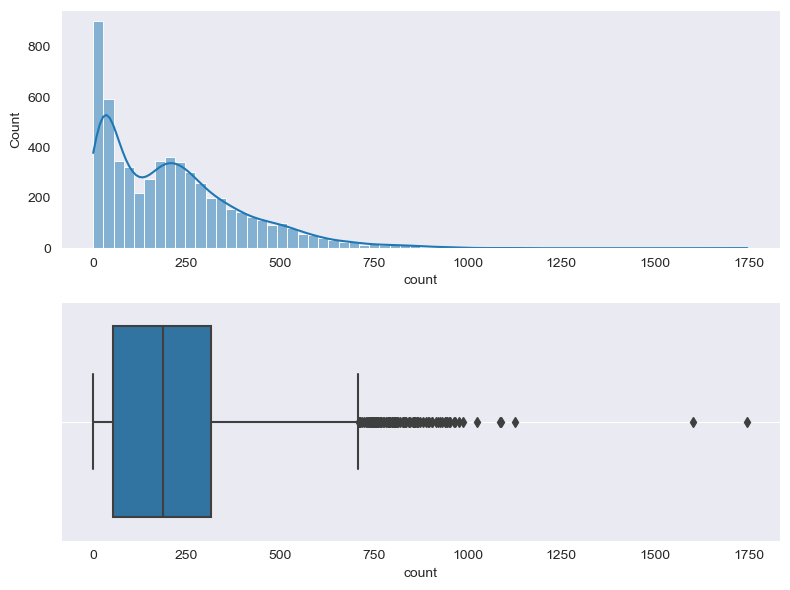

In [86]:
eda_1_n(df, 'count', bins=64)

6. 위 정보로 부터 파악한 내용 정리
+ 이상치는 특정 경우에 많은 대여가 있었다는 뜻인데 어느 케이스인지 확인할 필요가 있음

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [91]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
def eda_2_nn(data, col1, target):
    display(spst.pearsonr(data[col1], data[target]))

    plt.figure(figsize = (14,7))
    plt.subplot(1,2, 1)
    sns.regplot(x=col1, y=target, data=data)

    plt.subplot(1, 2, 2)
    sns.jointplot(x=col1, y=target, data=data)
    plt.tight_layout()
    plt.show()

def eda_2_cn_ttest(data, col1, target, checklist):
    temp = data.loc[data[col1].notnull(), :]

    s1 = temp.loc[temp[col1] == checklist[0], target]
    s2 = temp.loc[temp[col1] == checklist[1], target]
    display(spst.ttest_ind(s1 , s2))

    plt.figure(figsize=(6,6))
    sns.barplot(x=col1, y=target, data=temp)

def eda_2_cn_anova(data, col1, target, checklist):
    temp = data.loc[data[col1].notnull(), :]

    s=[]
    for i in range(len(checklist)):
        s.append(temp.loc[temp[col1] == checklist[i], target])
    display(spst.ttest_ind(s))

    plt.figure(figsize=(6,6))
    sns.barplot(x=col1, y=target, data=temp)


TtestResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98, df=5825.0)

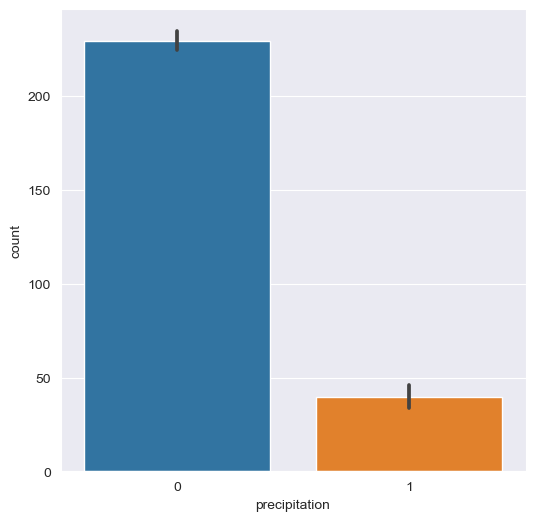

In [90]:
eda_2_cn_ttest(df, 'precipitation', 'count', [0, 1])

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

/var/folders/cv/bm835p_514v17vxq8gbgc5sc0000gn/T/ipykernel_1209/1703829108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

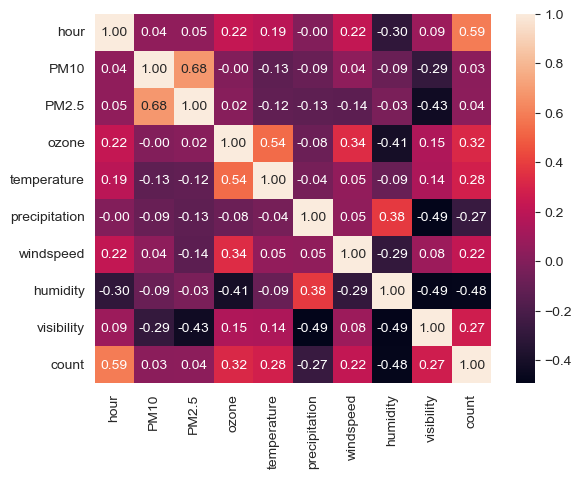

In [92]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

2. 시간대별 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.5864350283919423, pvalue=0.0)

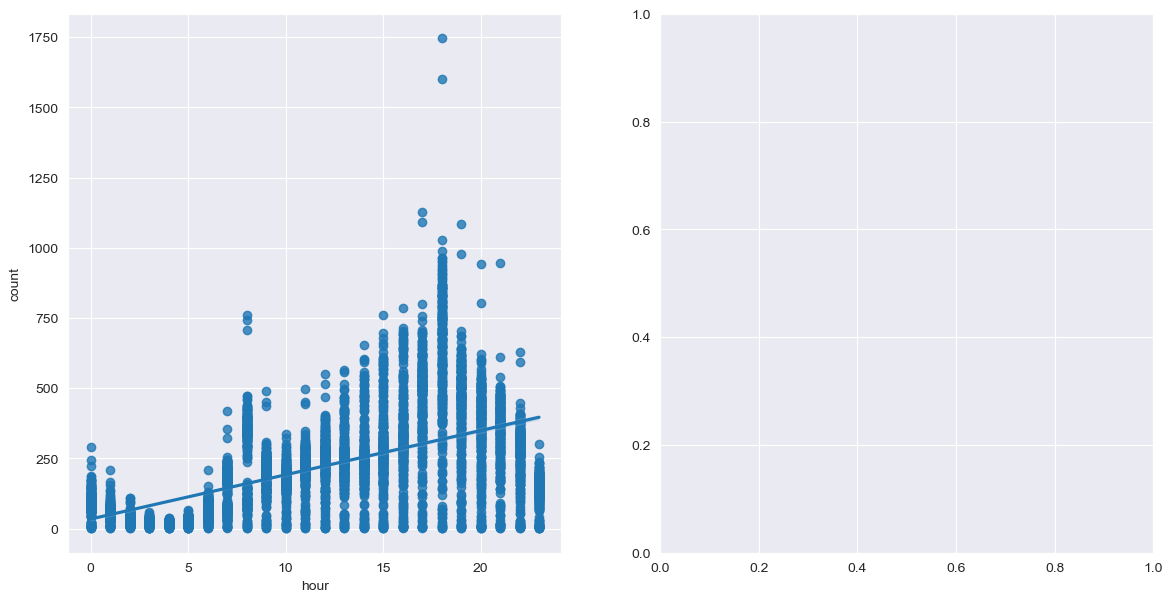

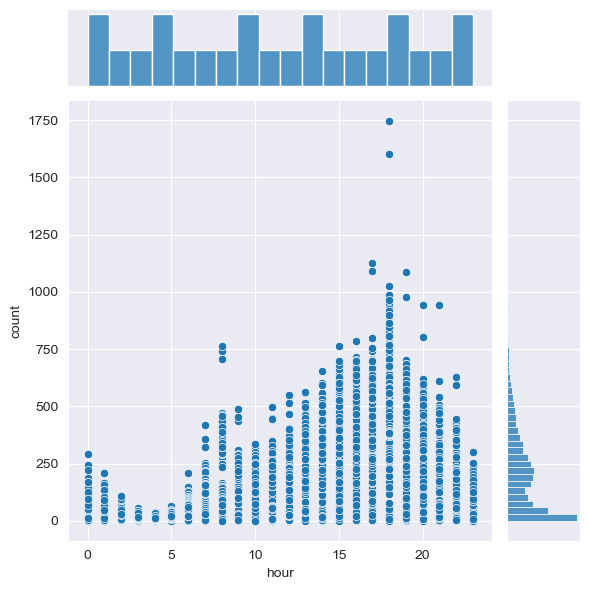

In [98]:
eda_2_nn(df, 'hour', 'count')

3. 온도 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.2771692363089789, pvalue=2.9405165551139833e-103)

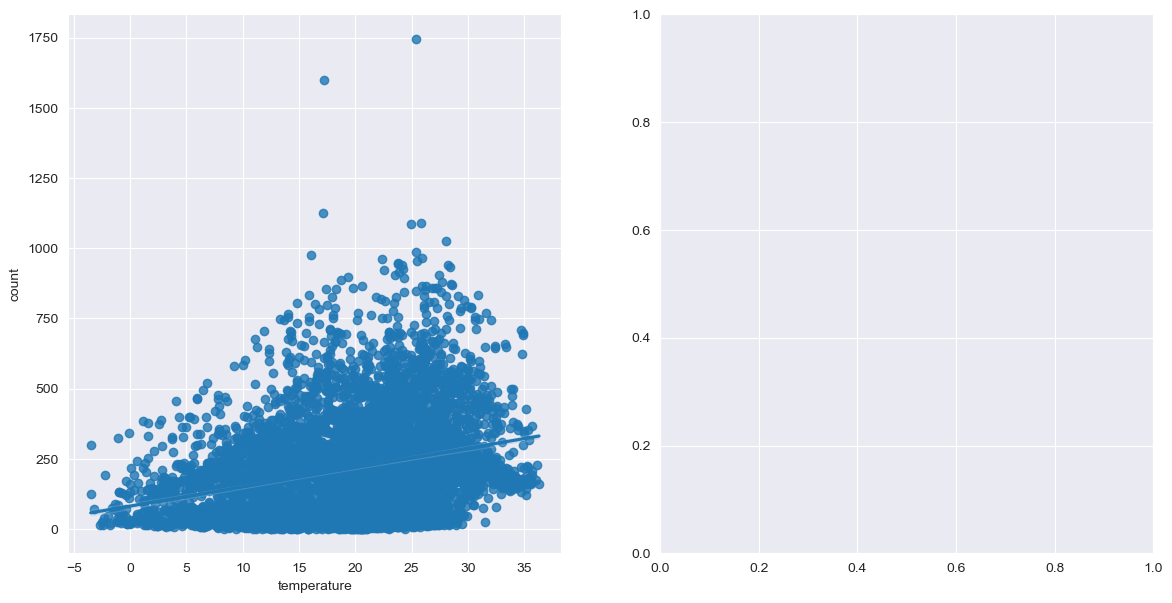

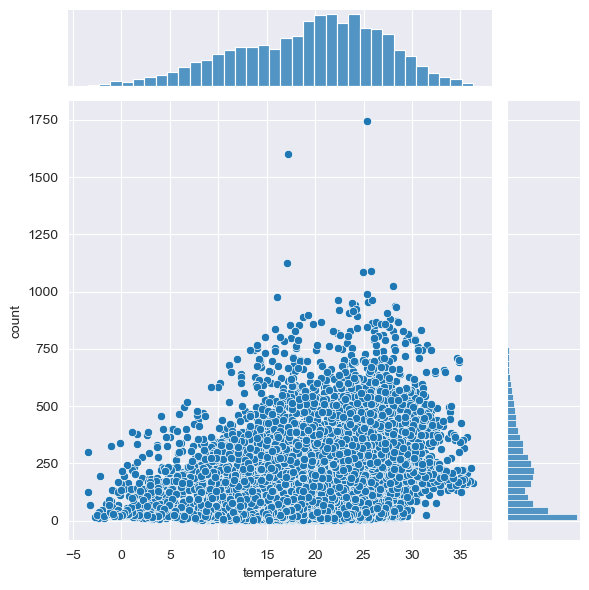

In [97]:
eda_2_nn(df, 'temperature', 'count')

온도를 둘로 나눠서 경향성 파악해보기

In [127]:
df[['temperature']].describe().T

count       mean       std  min   25%   50%   75%   max
temperature  5827.0  19.376798  7.501572 -3.5  14.1  20.4  24.9  36.3

In [137]:
df['temp_c'] = np.where(df['temperature']<20.4, 0, 1)

In [138]:
df['temp_c'].value_counts()

1    2936
0    2891
Name: temp_c, dtype: int64

PearsonRResult(statistic=0.17802738089654582, pvalue=5.151864457860859e-22)

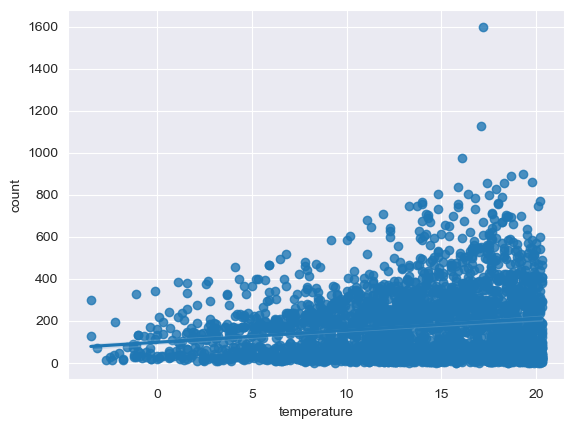

In [156]:
temp = df.loc[df['temp_c'] == 0, :]
display(spst.pearsonr(temp['temperature'], temp['count']))
sns.regplot(data =temp, x = 'temperature', y='count')
plt.show()

PearsonRResult(statistic=0.1674062085505071, pvalue=6.753735263978984e-20)

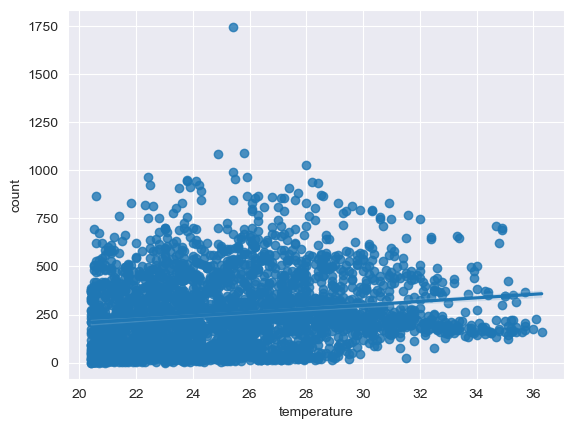

In [157]:
temp = df.loc[df['temp_c'] == 1, :]
display(spst.pearsonr(temp['temperature'], temp['count']))
sns.regplot(data =temp, x = 'temperature', y='count')
plt.show()

4. 풍속 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.22372189900674838, pvalue=5.243317678217521e-67)

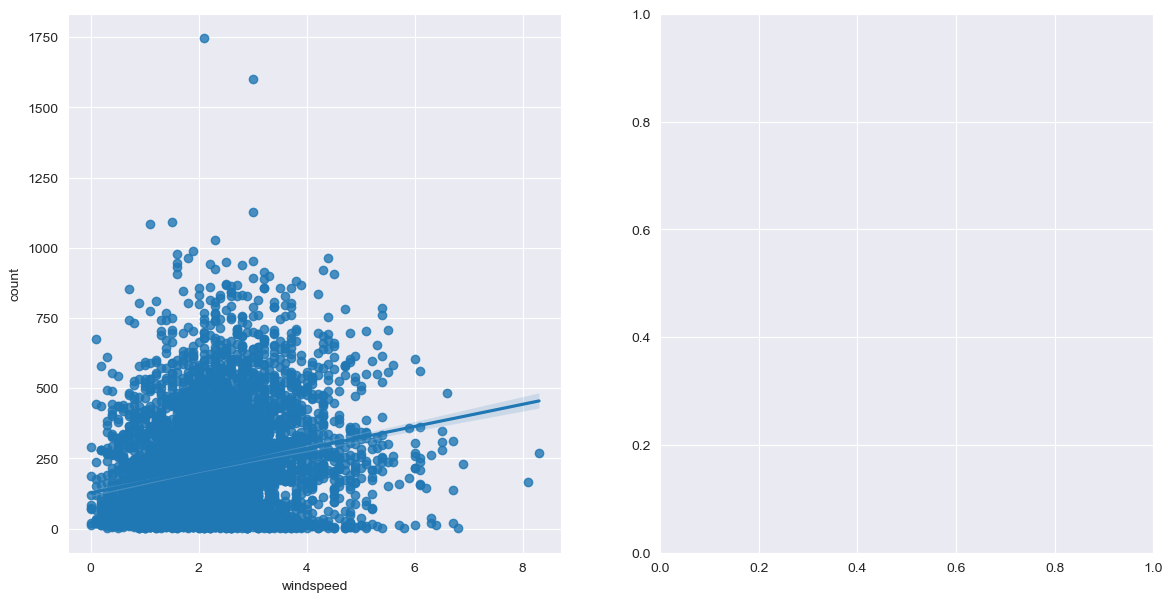

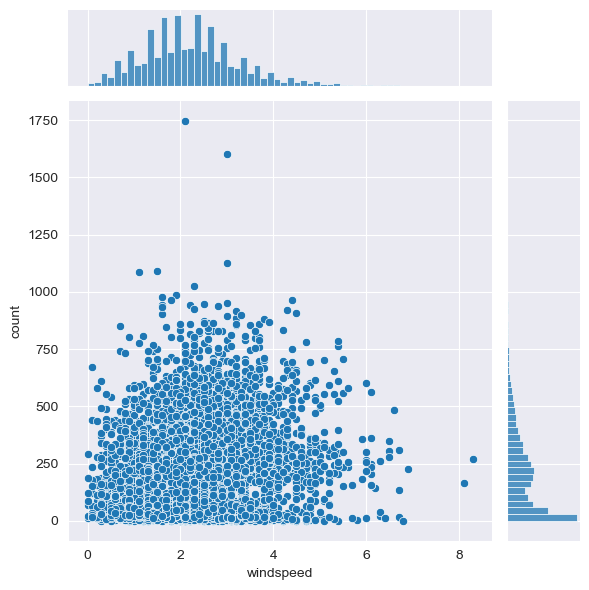

In [96]:
eda_2_nn(df, 'windspeed', 'count')

5. 습도 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=-0.4789554265904124, pvalue=0.0)

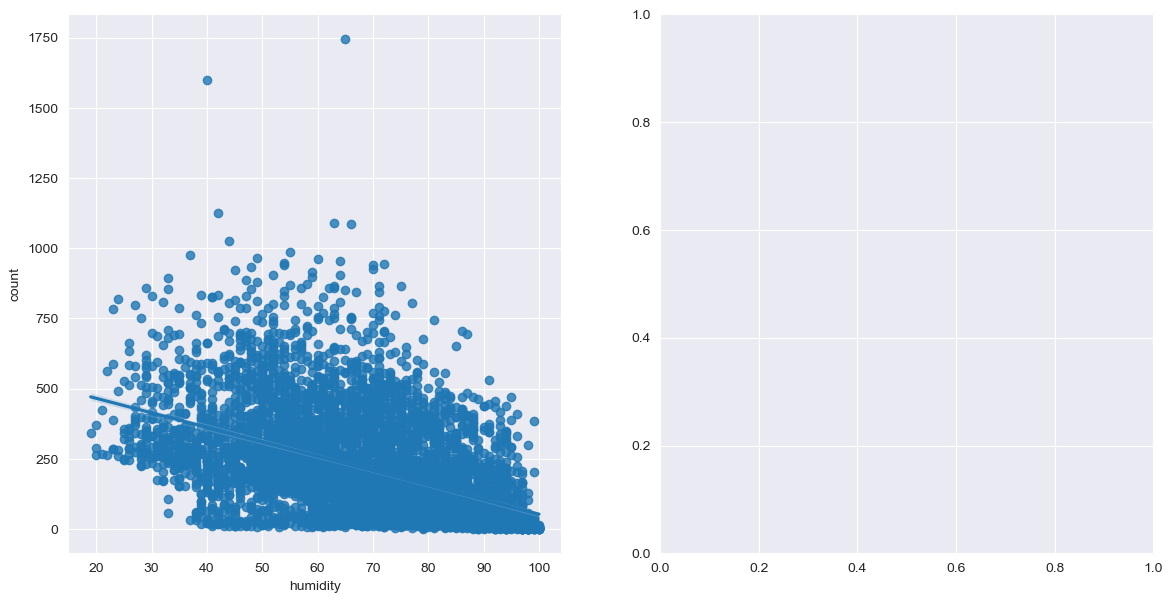

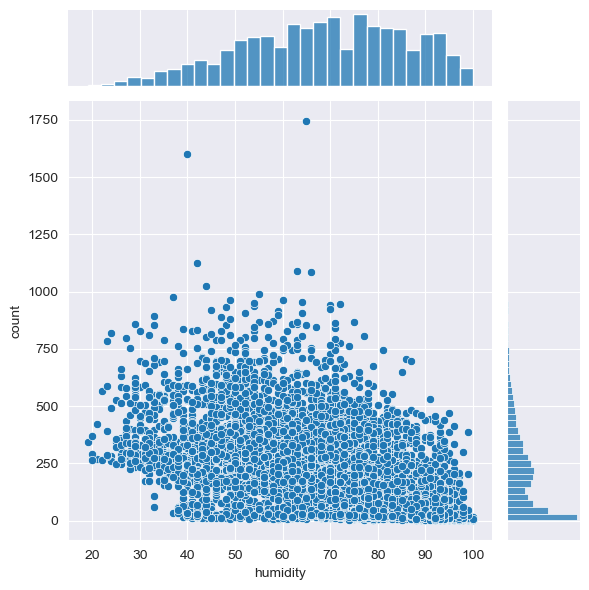

In [102]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
eda_2_nn(df, 'humidity', 'count')

6. 시정 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.2658277832748999, pvalue=7.876003852612501e-95)

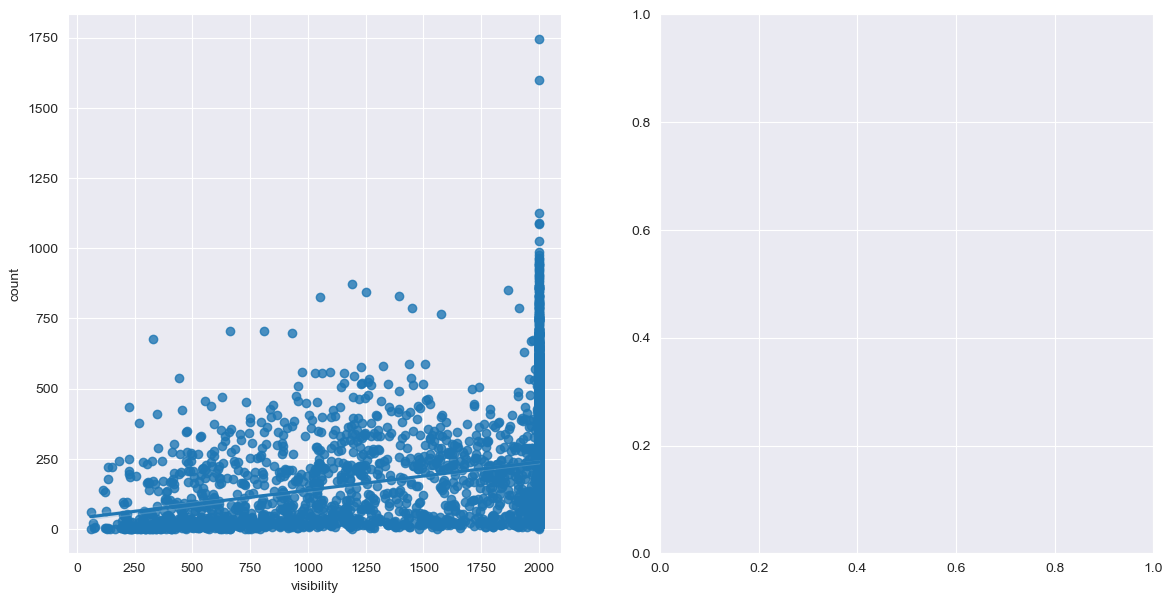

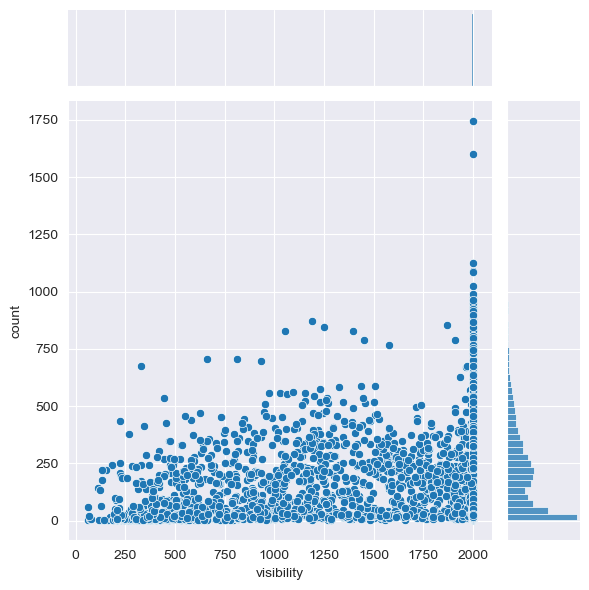

In [99]:
eda_2_nn(df, 'visibility', 'count')

7. 오존 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.3179918655691477, pvalue=4.721727543134792e-137)

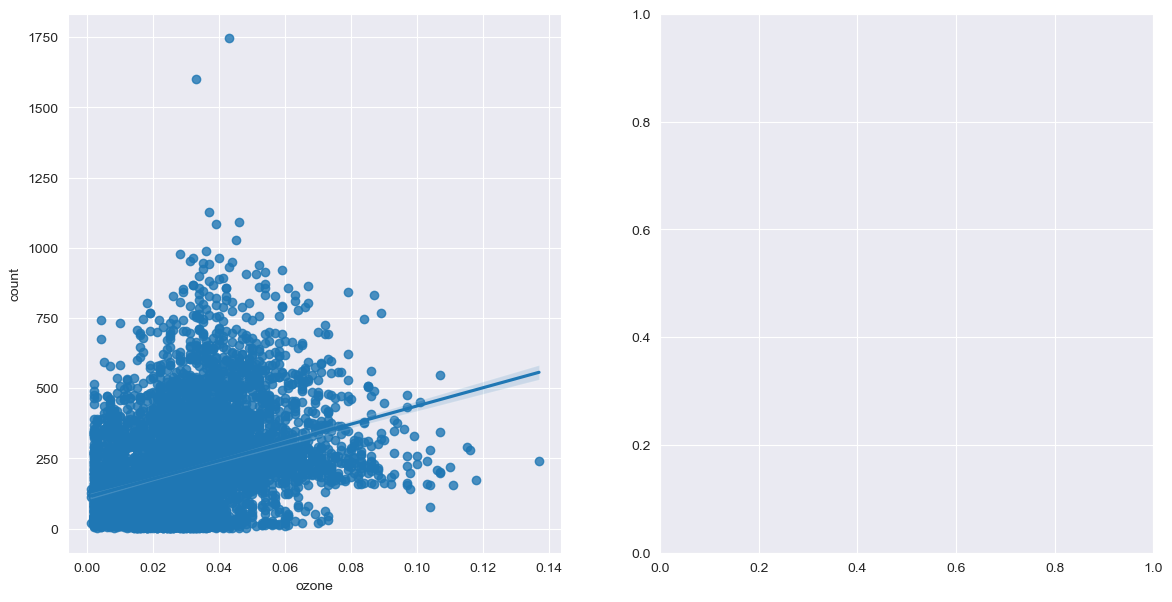

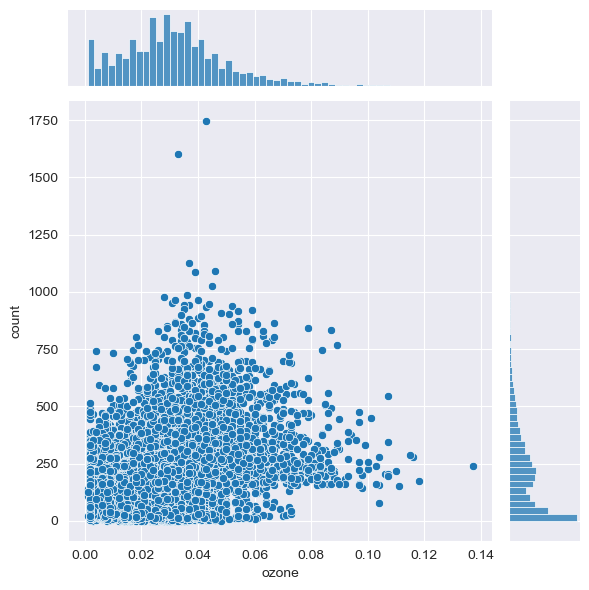

In [100]:
eda_2_nn(df, 'ozone', 'count')

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.02753552779908295, pvalue=0.035564992622624504)

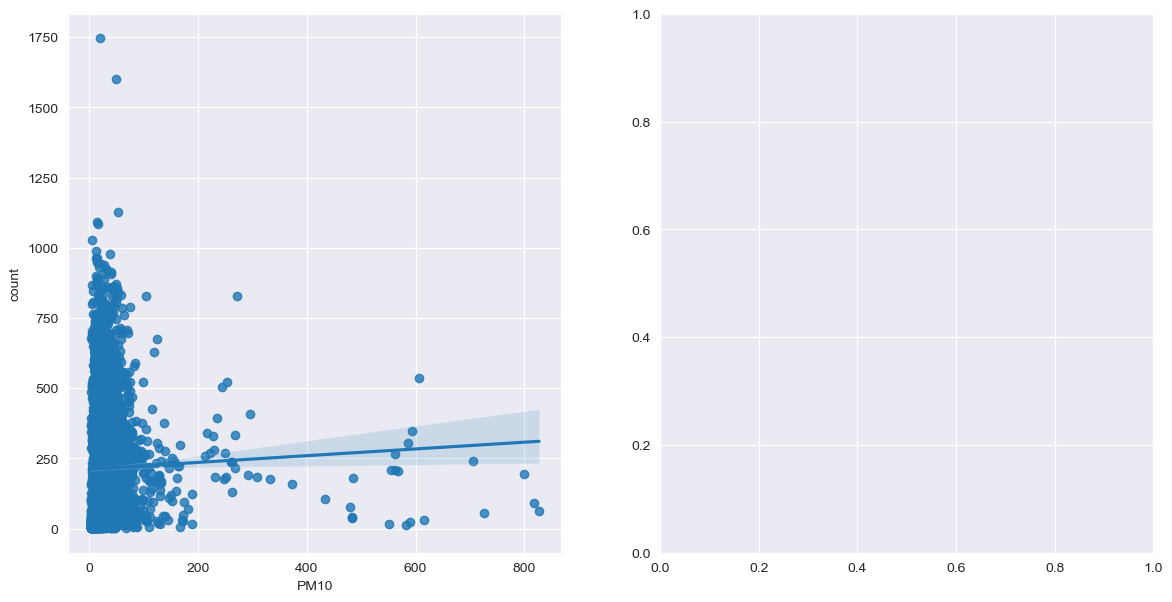

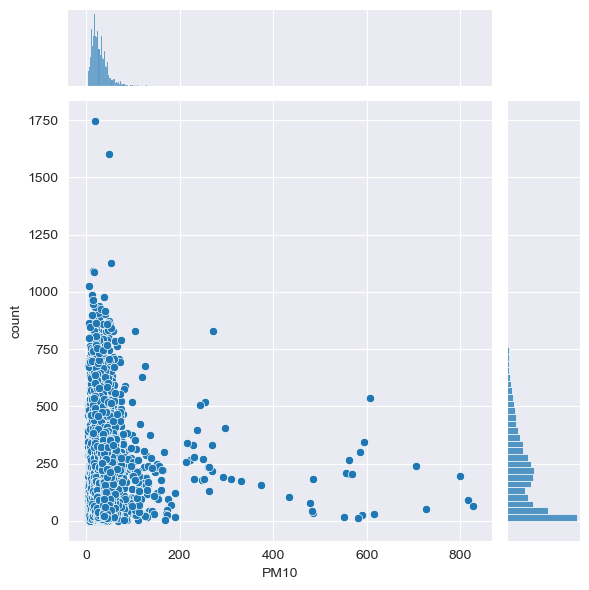

In [101]:
eda_2_nn(df, 'PM10', 'count')

PearsonRResult(statistic=0.07464743891025205, pvalue=1.320853153846362e-08)

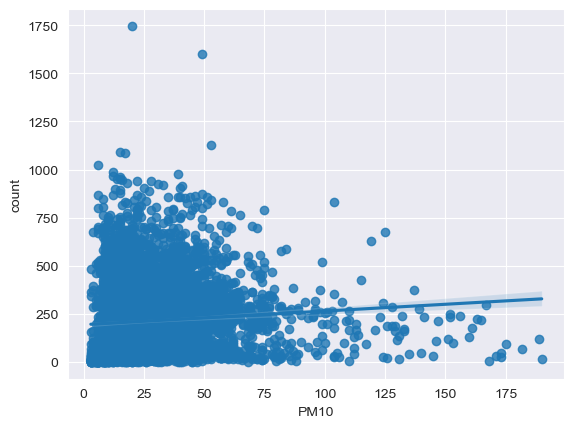

In [155]:
temp = df.loc[df['PM10'] < 200, :]
display(spst.pearsonr(temp['PM10'], temp['count']))
sns.regplot(data=temp, x='PM10', y='count')
plt.show()

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

PearsonRResult(statistic=0.03660851222600653, pvalue=0.005192535888553116)

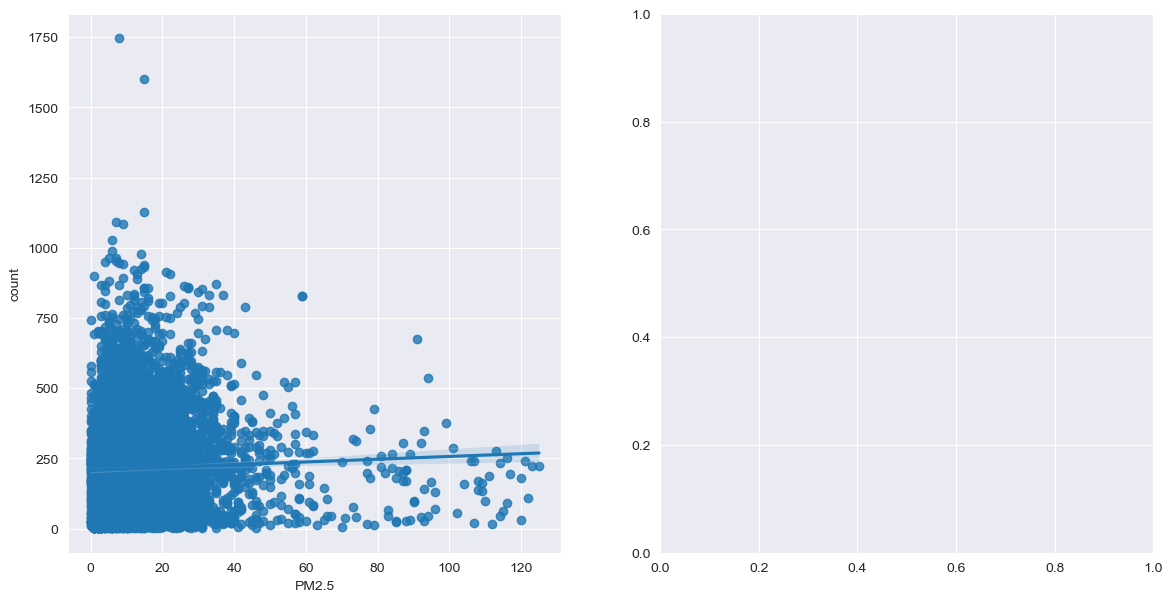

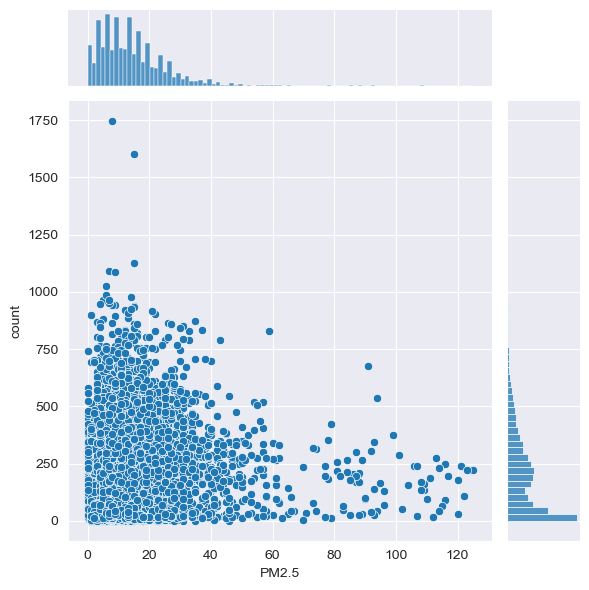

In [102]:
eda_2_nn(df, 'PM2.5', 'count')

# 주중과 주말에 따른 체크

In [105]:
df['Yoil'] = df['date'].dt.weekday
df['Yoil'].value_counts()
df['Yoil_category'] = pd.cut(df['Yoil'], bins=[-1, 4.5, 7], labels=[0, 1]) # 1은 주말, 0은 평일
df['Yoil_category'].value_counts()

0    4147
1    1680
Name: Yoil_category, dtype: int64

<Axes: xlabel='Yoil_category', ylabel='count'>

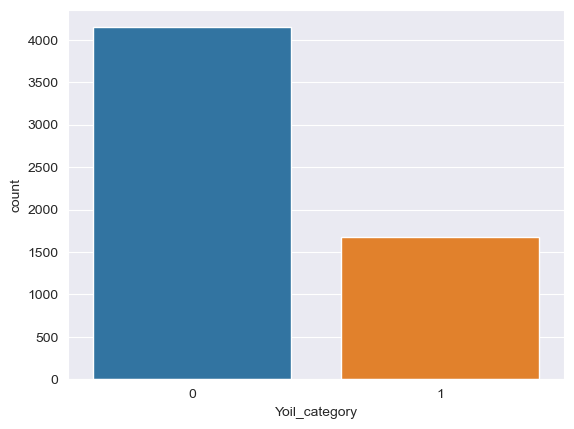

In [106]:
sns.countplot(x='Yoil_category', data=df)

In [109]:
def eda_2_nn_h(data, col1, target, h):
    display(spst.pearsonr(data[col1], data[target]))

    plt.figure(figsize = (21,7))
    plt.subplot(1,3, 1)
    sns.regplot(x=col1, y=target, data=data)

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=col1, y=target, data=data, hue=h)

    plt.subplot(1, 3, 3)
    sns.jointplot(x=col1, y=target, data=data, hue=h)
    plt.tight_layout()
    plt.show()

TtestResult(statistic=3.8974110319479296, pvalue=9.831763048935541e-05, df=5825.0)

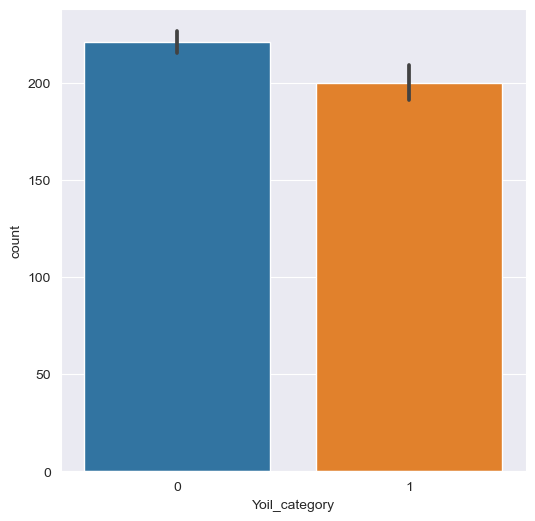

In [110]:
eda_2_cn_ttest(df, 'Yoil_category', 'count', [0, 1])

PearsonRResult(statistic=0.5864350283919423, pvalue=0.0)

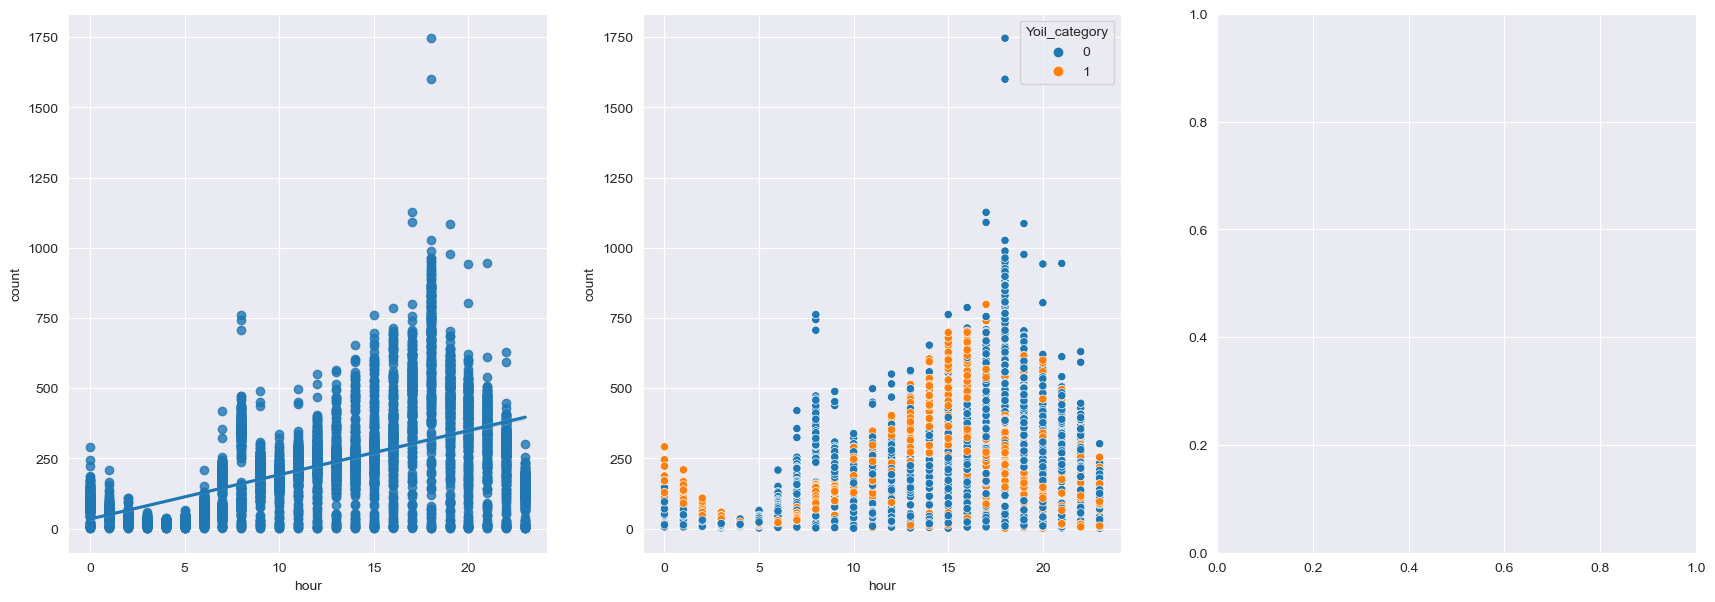

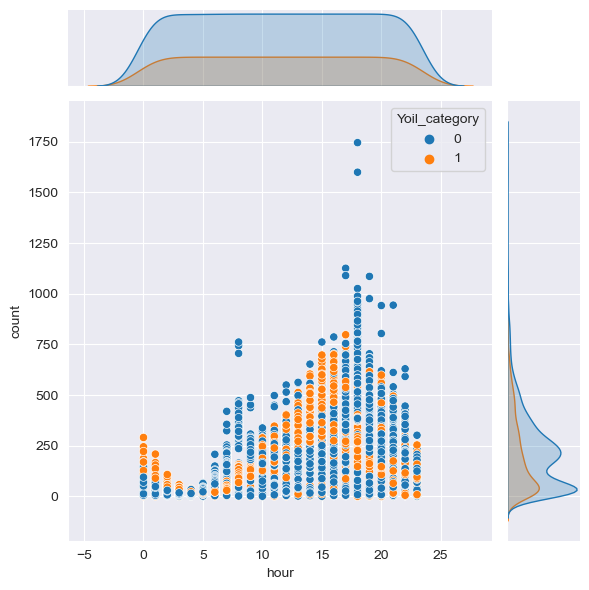

In [111]:
eda_2_nn_h(df, 'hour', 'count', 'Yoil_category')

PearsonRResult(statistic=0.2771692363089789, pvalue=2.9405165551139833e-103)

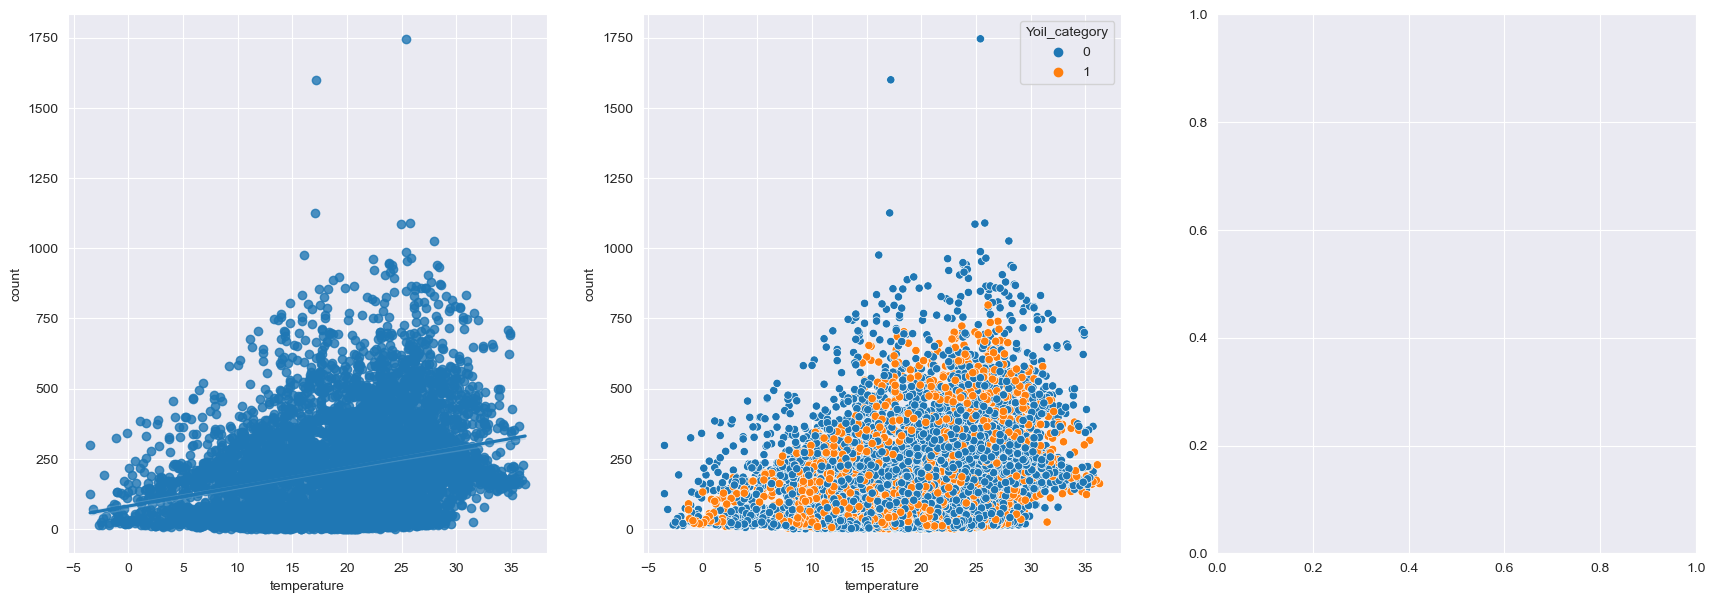

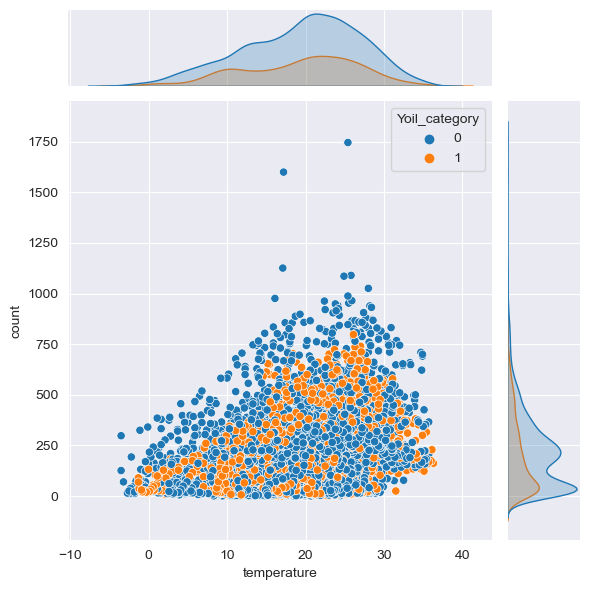

In [112]:
eda_2_nn_h(df, 'temperature', 'count', 'Yoil_category')

PearsonRResult(statistic=0.22372189900674838, pvalue=5.243317678217521e-67)

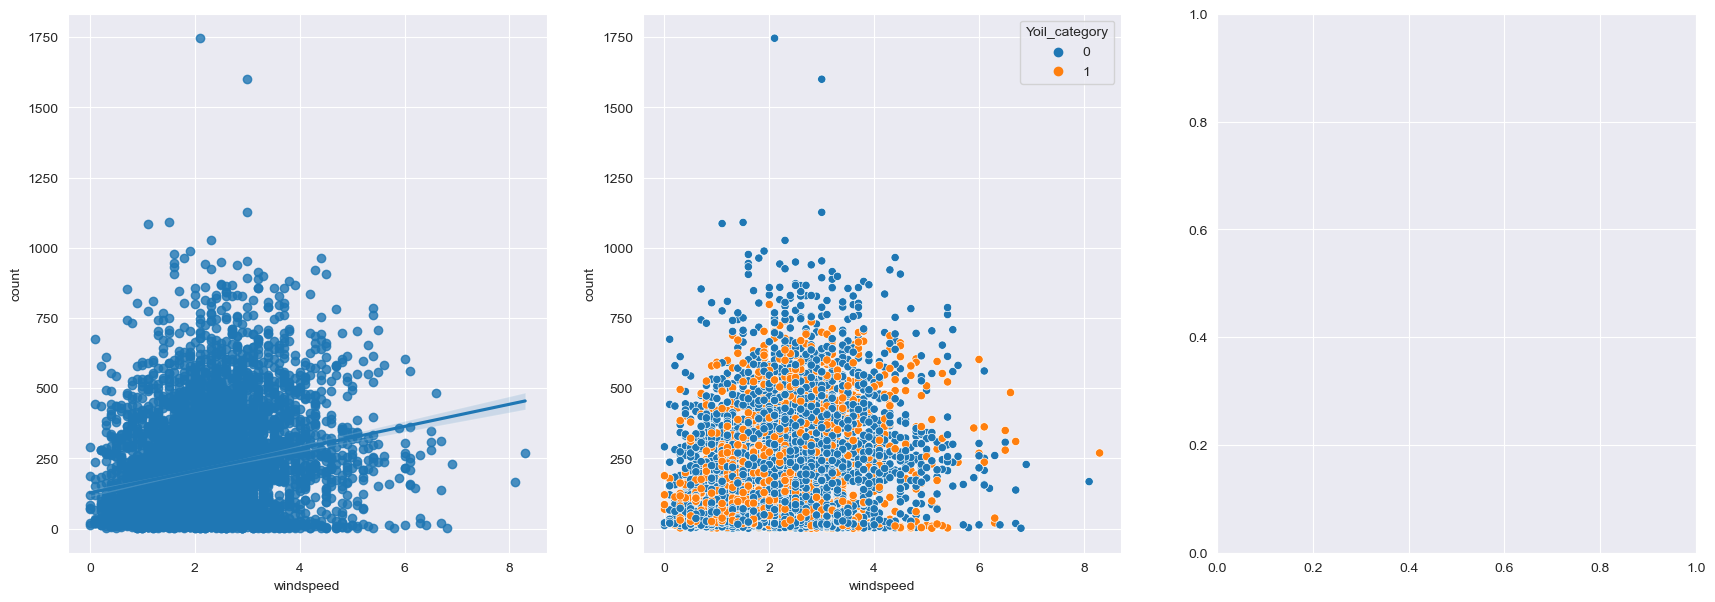

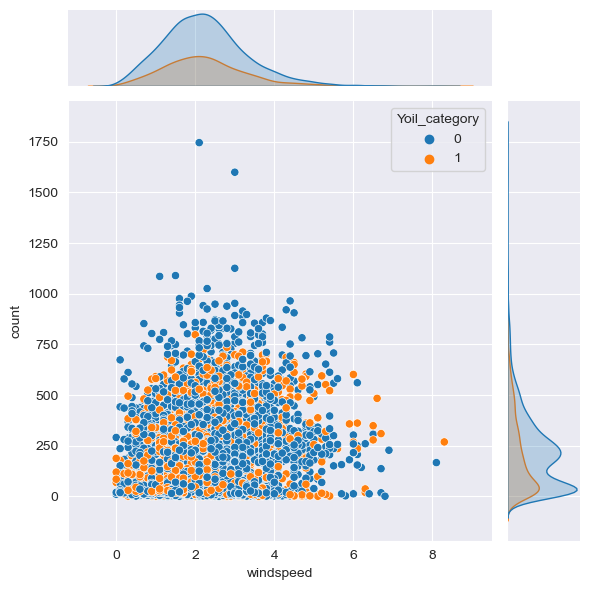

In [113]:
eda_2_nn_h(df, 'windspeed', 'count', 'Yoil_category')

PearsonRResult(statistic=-0.4789554265904124, pvalue=0.0)

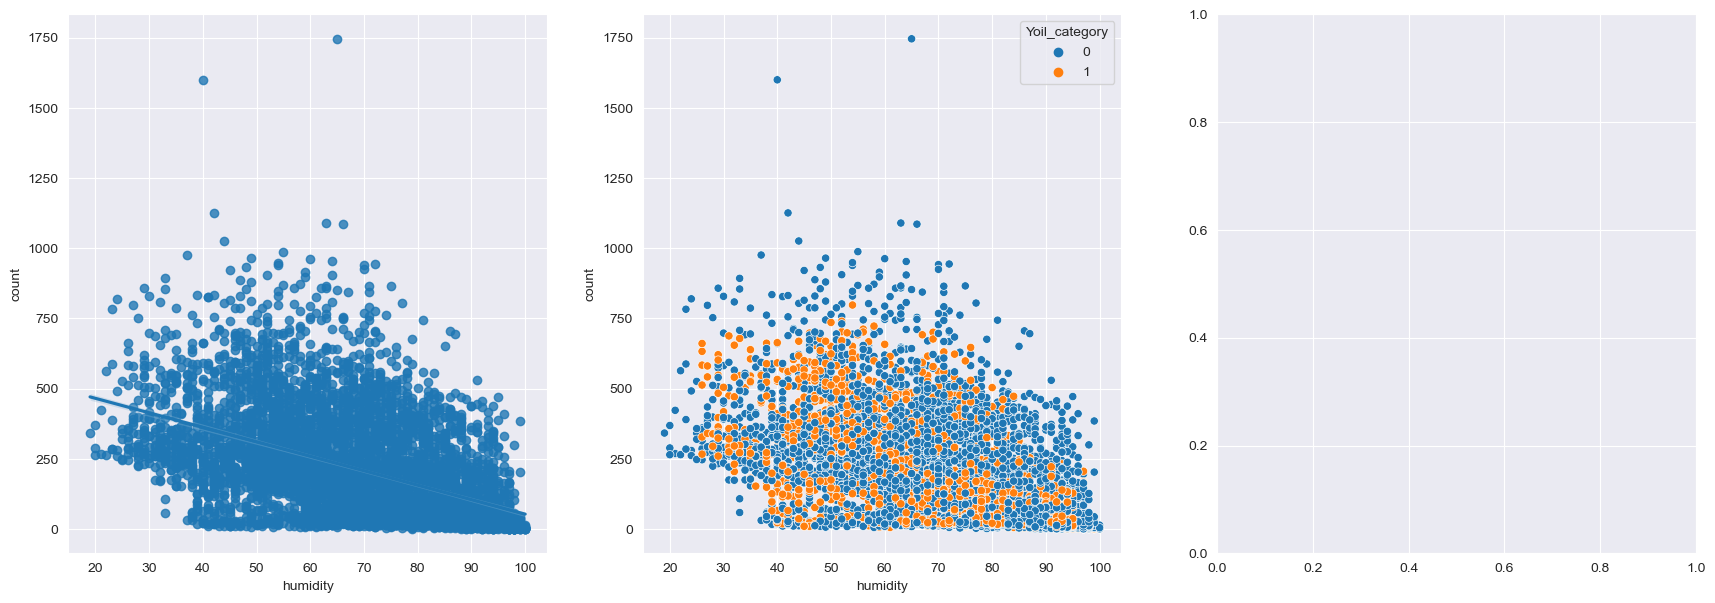

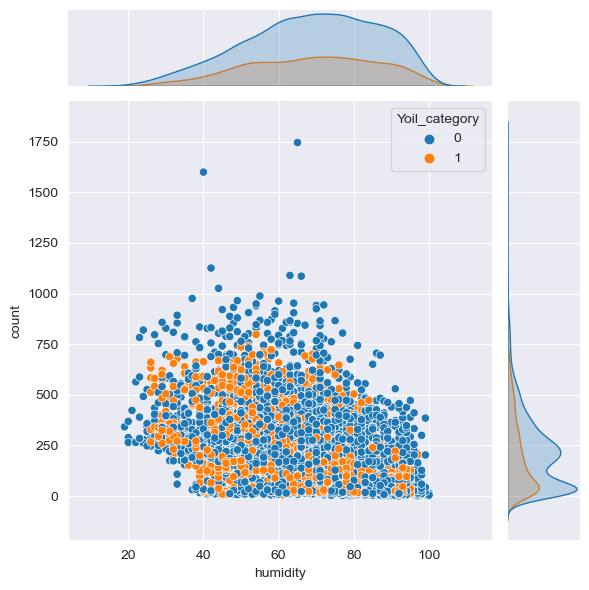

In [114]:
eda_2_nn_h(df, 'humidity', 'count', 'Yoil_category')

PearsonRResult(statistic=0.3179918655691477, pvalue=4.721727543134792e-137)

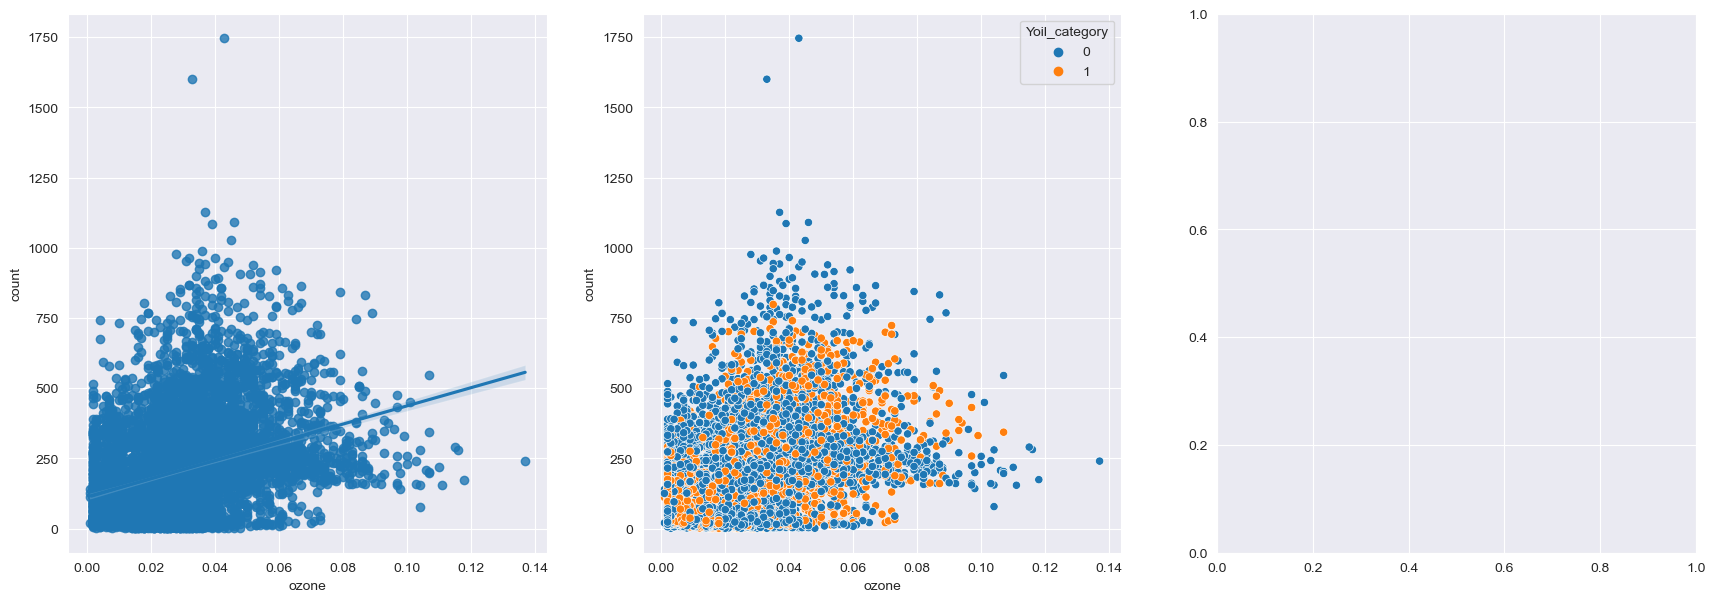

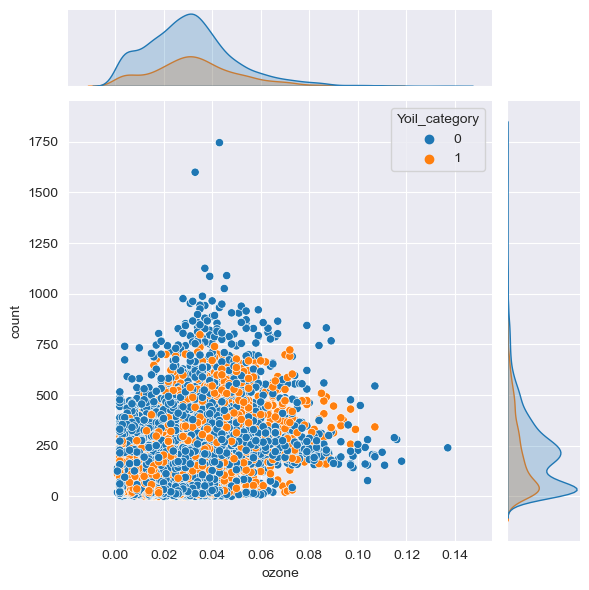

In [115]:
eda_2_nn_h(df, 'ozone', 'count', 'Yoil_category')

PearsonRResult(statistic=0.02753552779908295, pvalue=0.035564992622624504)

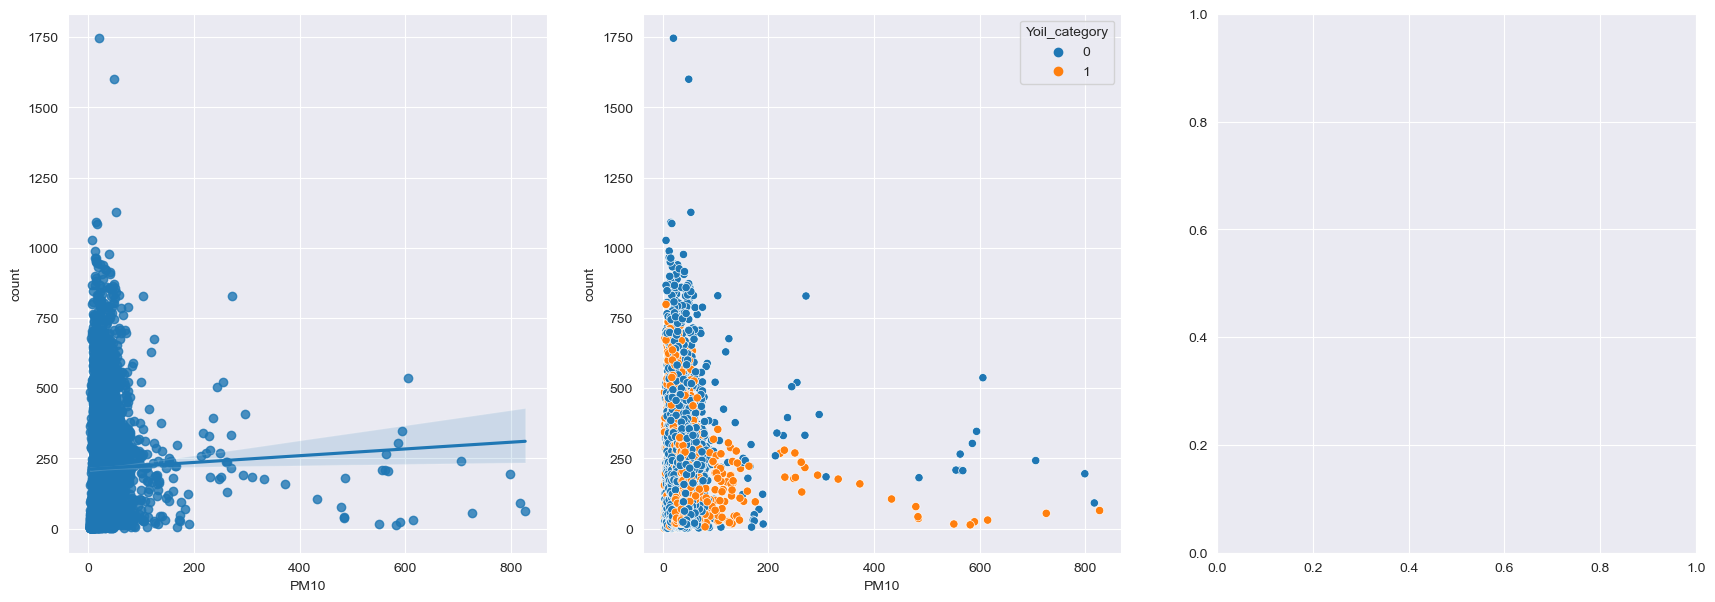

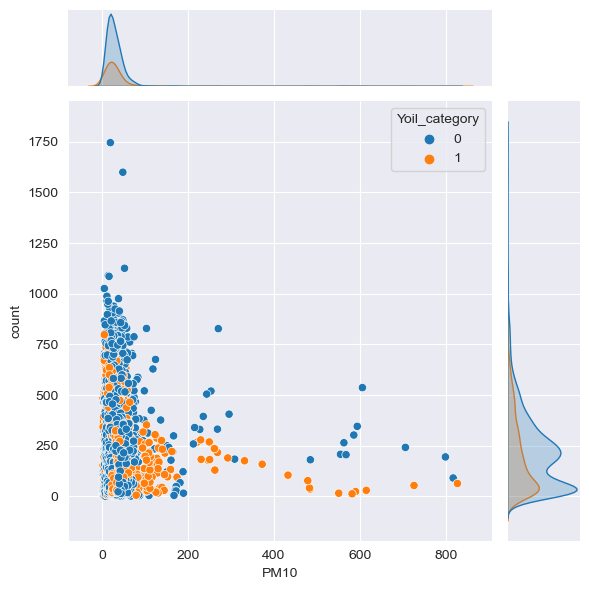

In [116]:
eda_2_nn_h(df, 'PM10', 'count', 'Yoil_category')

PearsonRResult(statistic=0.03660851222600653, pvalue=0.005192535888553116)

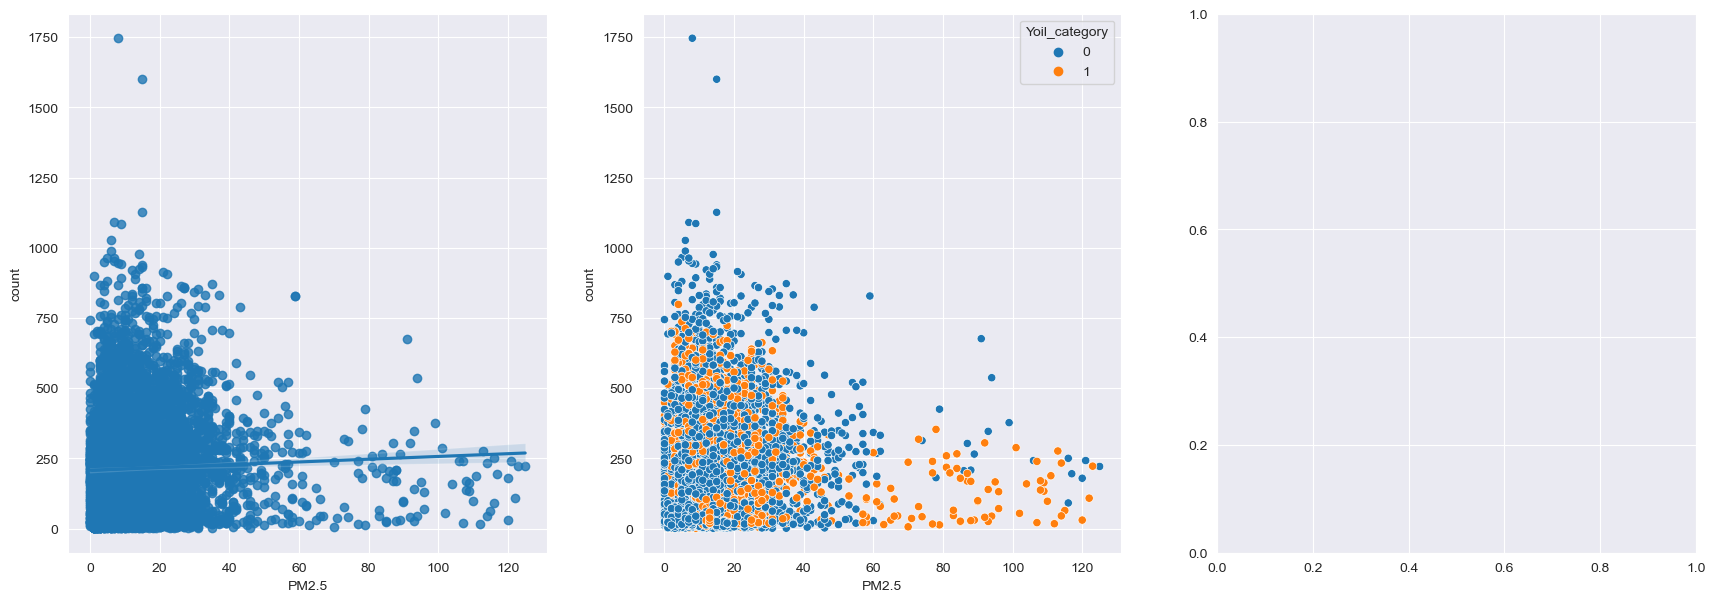

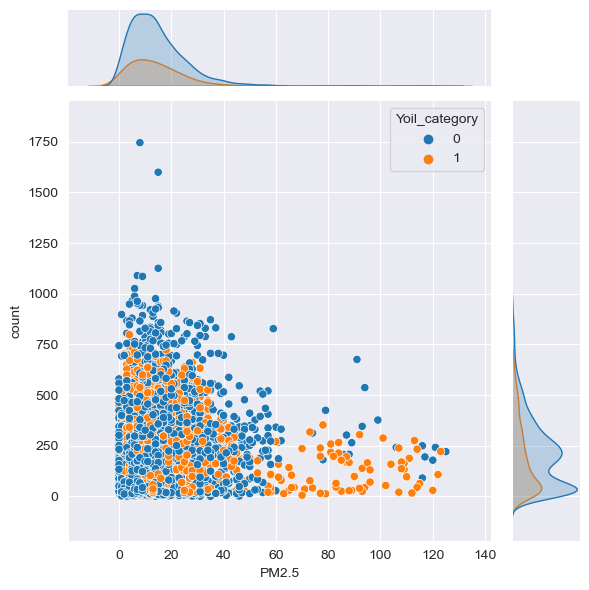

In [117]:
eda_2_nn_h(df, 'PM2.5', 'count', 'Yoil_category')

count       mean       std  min  25%   50%   75%   max
hour  5827.0  11.506607  6.921963  0.0  6.0  12.0  18.0  23.0

<Axes: xlabel='hour', ylabel='Density'>

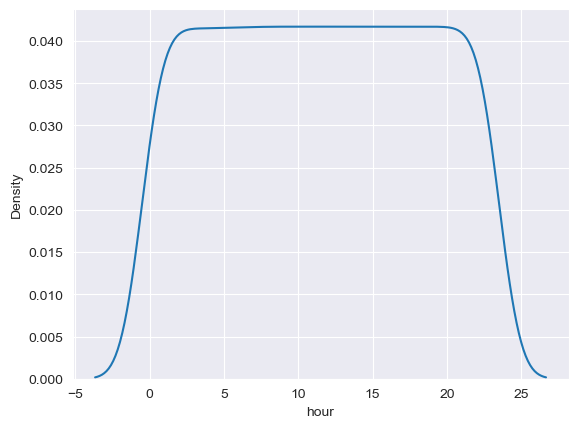

In [118]:
display(df[['hour']].describe().T)

sns.kdeplot(df['hour'])

시간을 범주화 하기

<Axes: xlabel='hour_c', ylabel='count'>

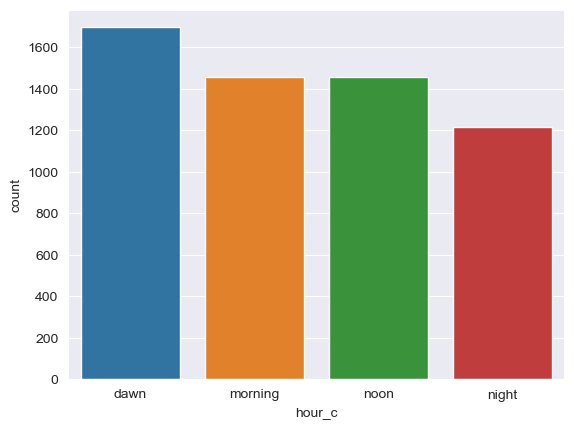

In [119]:
df['hour_c'] = pd.cut(df['hour'], bins=[-1, 6.5, 12.5, 18.5, 24.5], labels=['dawn', 'morning', 'noon', 'night'])
df['hour_c'].value_counts()

sns.countplot(data=df, x='hour_c')

F_onewayResult(statistic=1479.4317339120153, pvalue=0.0)

<Axes: xlabel='hour_c', ylabel='count'>

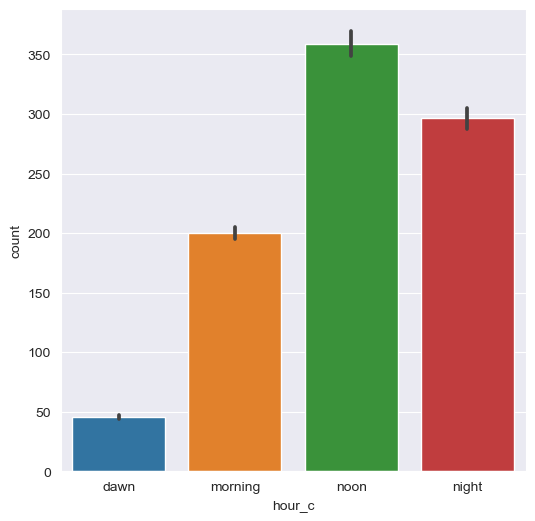

In [120]:
temp = df.loc[df['hour_c'].notnull(), :]



s1 = temp.loc[temp['hour_c'] == 'dawn', 'count']
s2 = temp.loc[temp['hour_c'] == 'morning', 'count']
s3 = temp.loc[temp['hour_c'] == 'noon', 'count']
s4 = temp.loc[temp['hour_c'] == 'night', 'count']
display(spst.f_oneway(s1, s2, s3, s4))

plt.figure(figsize=(6,6))
sns.barplot(x='hour_c', y='count', data=temp)

PearsonRResult(statistic=0.2771692363089789, pvalue=2.9405165551139833e-103)

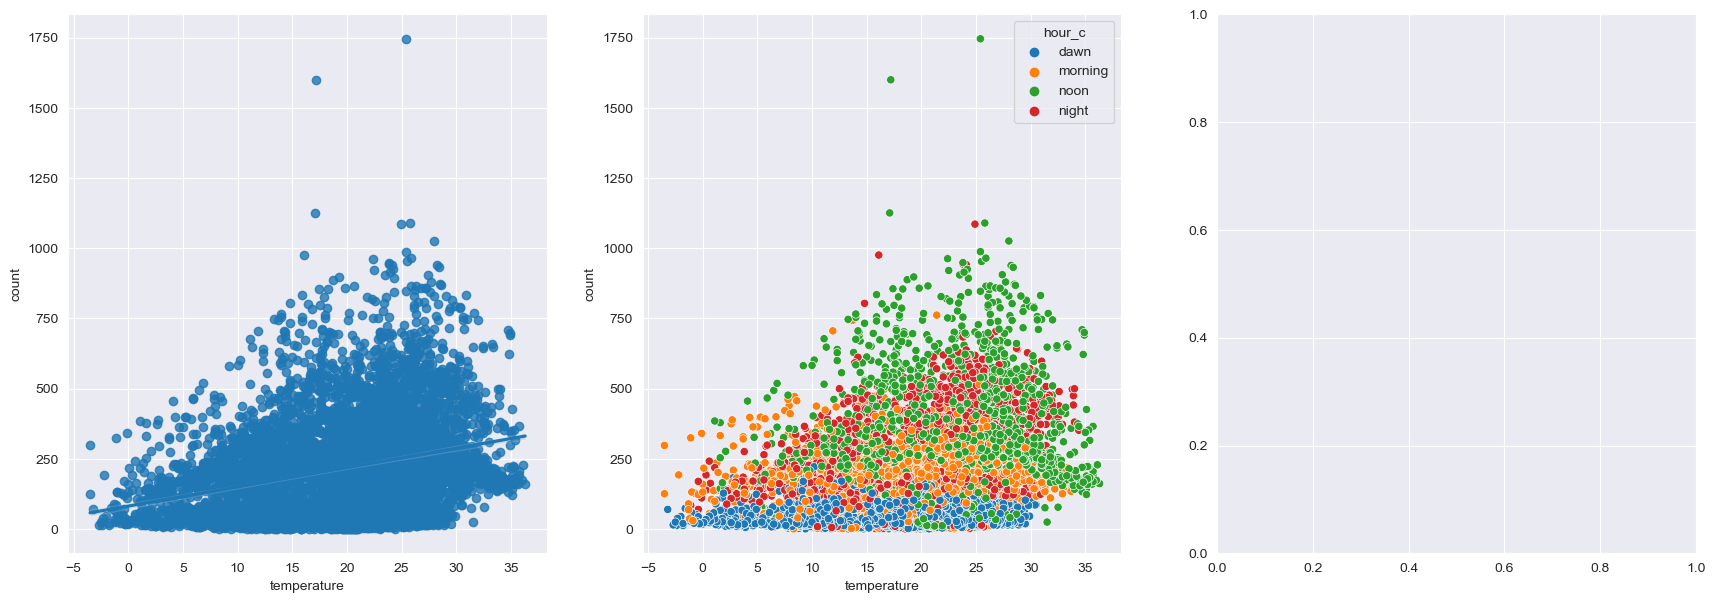

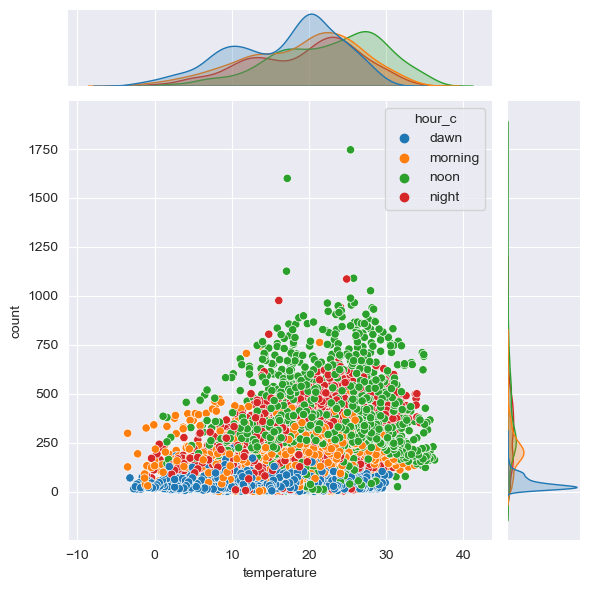

In [122]:
eda_2_nn_h(df, 'temperature', 'count', 'hour_c')

PearsonRResult(statistic=0.22372189900674838, pvalue=5.243317678217521e-67)

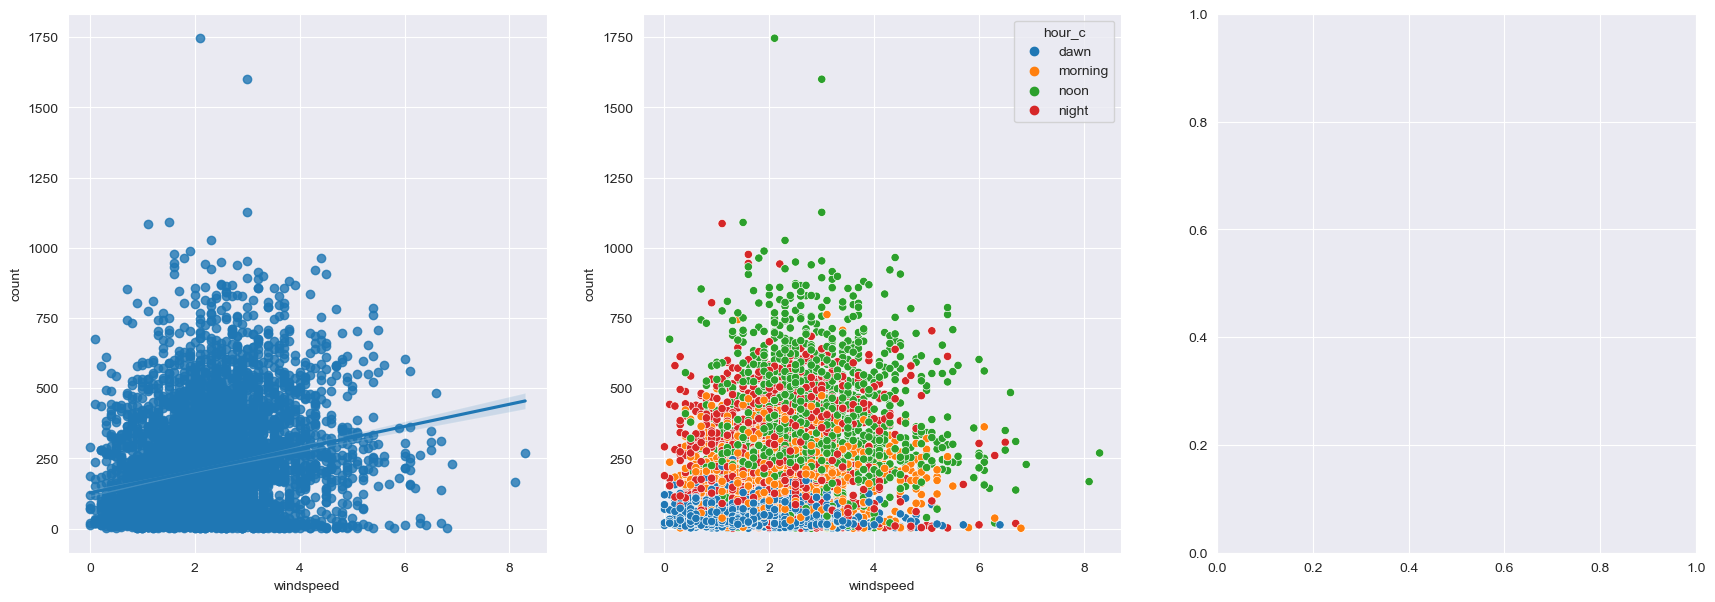

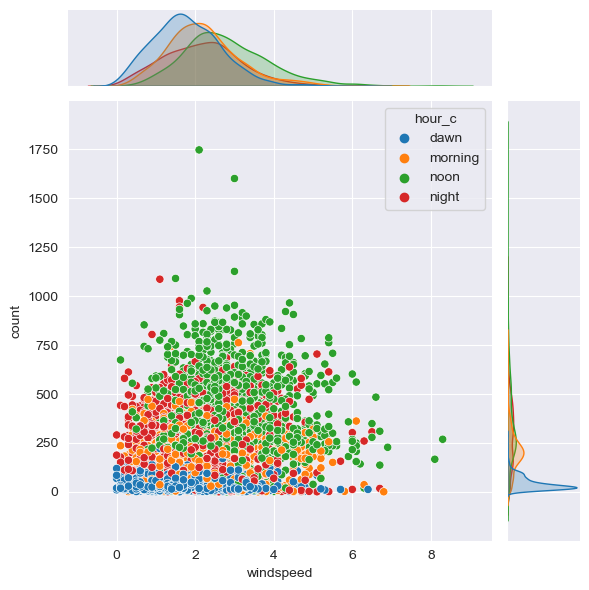

In [123]:
eda_2_nn_h(df, 'windspeed', 'count', 'hour_c')

PearsonRResult(statistic=0.2658277832748999, pvalue=7.876003852612501e-95)

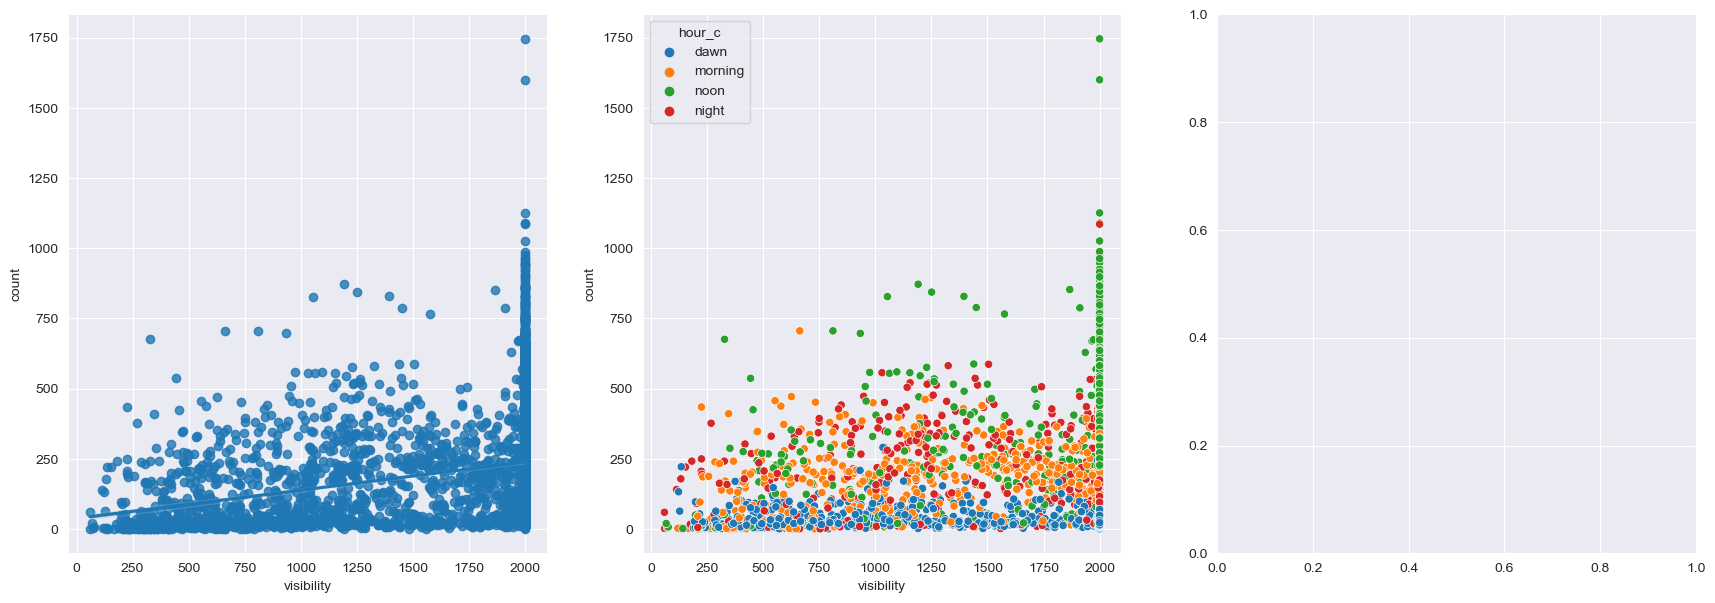

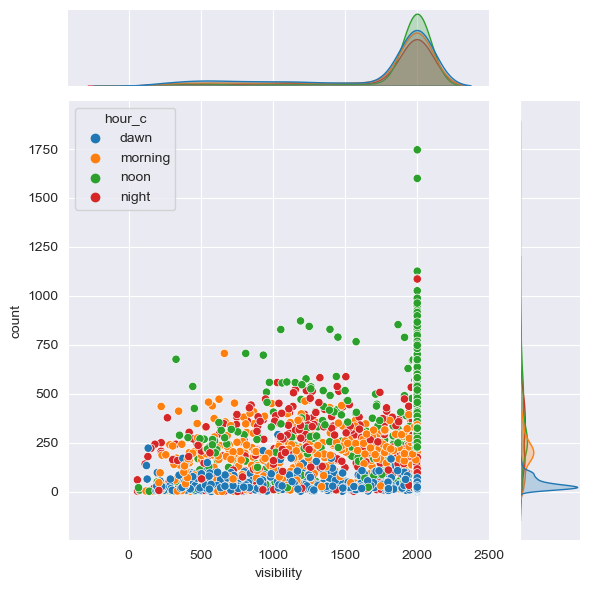

In [124]:
eda_2_nn_h(df, 'visibility', 'count', 'hour_c')

PearsonRResult(statistic=0.3179918655691477, pvalue=4.721727543134792e-137)

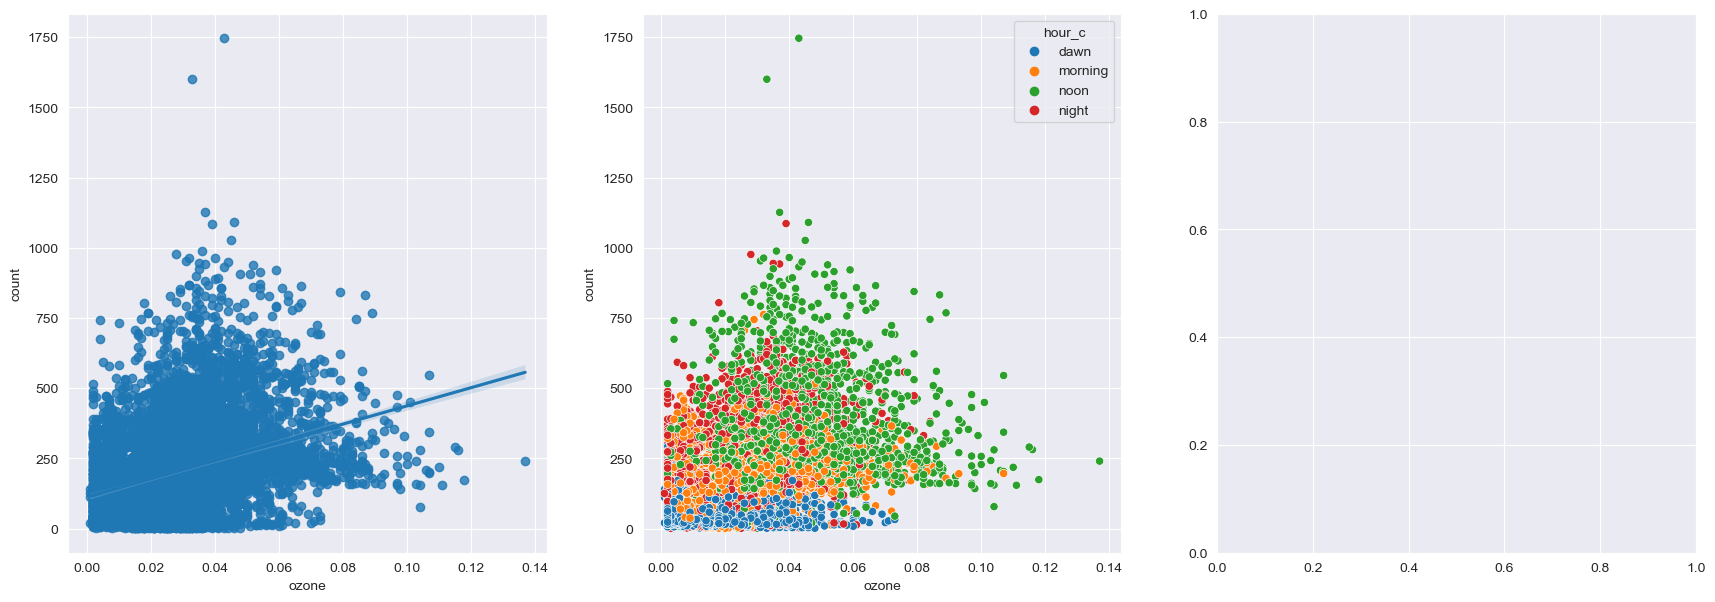

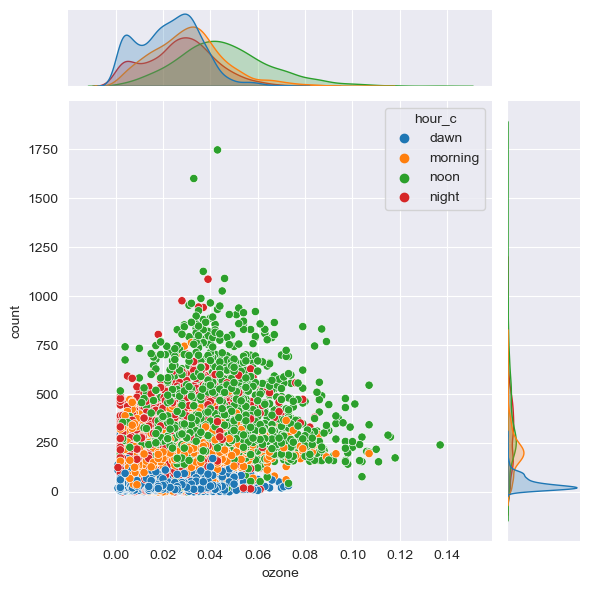

In [125]:
eda_2_nn_h(df, 'ozone', 'count', 'hour_c')

PearsonRResult(statistic=0.02753552779908295, pvalue=0.035564992622624504)

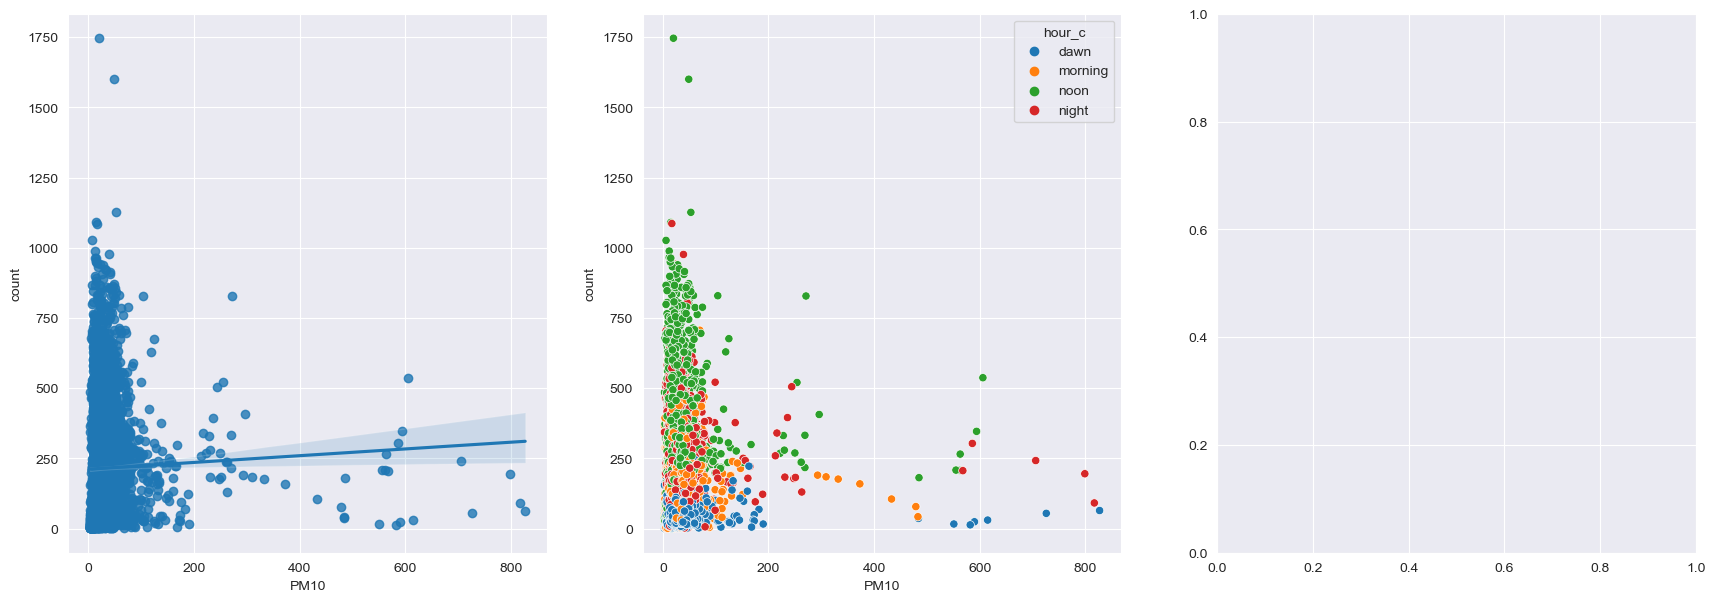

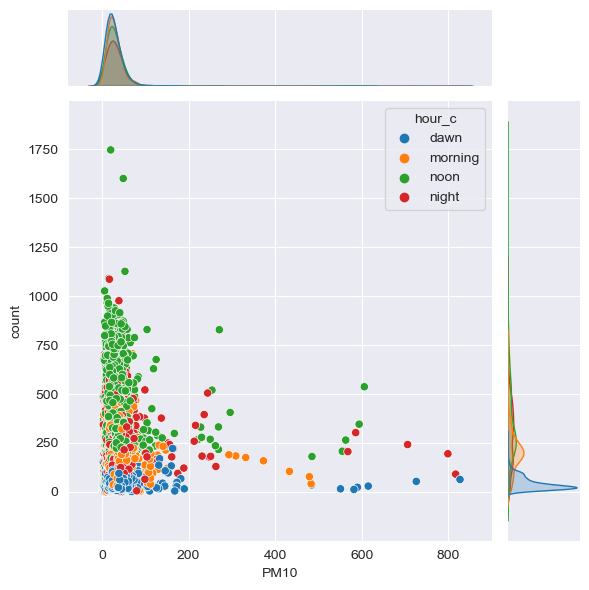

In [126]:
eda_2_nn_h(df, 'PM10', 'count', 'hour_c')

계절 나눠서 파악하기

In [143]:
df.columns

Index(['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature',
       'precipitation', 'windspeed', 'humidity', 'visibility', 'count', 'Yoil',
       'Yoil_category', 'hour_c', 'temp_c'],
      dtype='object')

In [148]:
df[['date']].describe().T

/var/folders/cv/bm835p_514v17vxq8gbgc5sc0000gn/T/ipykernel_1209/4176971115.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['date']].describe().T


count unique        top freq      first       last
date  5827    244 2021-08-01   24 2021-04-01 2021-11-30

In [151]:
df['season'] = np.where(df['date']<='2021-05-31', 'spring', np.where(df['date']<='2021-08-31', 'summer', 'fall'))
df['season'].value_counts()

summer    2208
fall      2159
spring    1460
Name: season, dtype: int64

F_onewayResult(statistic=6.851253890206409, pvalue=0.0010666772757495584)

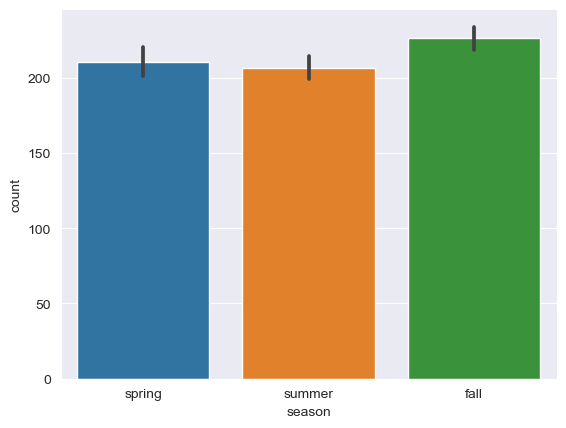

In [154]:
t1 = df.loc[df['season'] == 'spring', 'count']
t2 = df.loc[df['season'] == 'summer', 'count']
t3 = df.loc[df['season'] == 'fall', 'count']

display(spst.f_oneway(t1, t2, t3))

sns.barplot(x='season', y='count', data=df)
plt.show()

### [Step5] 가설 검정

- 가설 1
    + $H_0$ : 강우 여부와 따릉이 간에는 연관성이 없다.
    + $H_1$ : 강우 여부와 따릉이 간에는 연관성이 있다.

- 가설 2
    + $H_0$ : 온도와 따릉이 간에는 연관성이 없다.
    + $H_1$ : 온도와 따릉이 간에는 연관성이 있다.

- 가설 3
    + $H_0$ : 미세먼지와 따릉이 간에는 연관성이 없다.
    + $H_1$ : 미세먼지와 따릉이 간에는 연관성이 있다.

- 가설 4
    + $H_0$ : 시간과 따릉이 간에는 연관성이 없다.
    + $H_1$ : 시간과 따릉이 간에는 연관성이 있다.

- 가설 5
    + $H_0$ : 계절과 따릉이 간에는 연관성이 없다.
    + $H_1$ : 계절과 따릉이 간에는 연관성이 있다.

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

+ 강우 여부
+ 시간

#### <font color='green'>2. 약한 관계의 변수</font>


+ 계절
+ 온도
+ 주말

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


+ 미세먼지

### [Step6] Insight 도출
+ 미세먼지는 생각보다 관련이 없었고 강우여부는 비가오면 자전거를 타기 힘들기에 강할 것이라 예상한 것이 적중하였다.
+ 온도는 지금 현재는 약한 상관관계이지만 겨울데이터가 없기 때문에 겨울 관련 데이터를 수집할 필요성이 있다고 생각된다.
+ 계절도 동일한 맥락에서 데이터가 더 필요하다.
+ 시간은 낮과 밤에 자주 타는 것으로 파악된다.
    + 시간을 나누다가 주말의 여부도 영향을 줄 것 같아 분석해보았습니다.
    + 영향을 주긴 했지만 평일에 타는 인원이 많은 것으로 보아 따릉이의 이용 목적에 대한 데이터도 얻을 수 있다면 확인해볼 필요가 있다고 판단됩니다.